### 1.IMPORTS

In [1]:
# imports

%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers, initializers, optimizers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.feature_selection import SelectKBest,f_regression
from imblearn.combine import SMOTETomek
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

import tensorflow.compat.v2 as tf
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras import initializers
import numpy as np
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
import matplotlib.pylab as plt 
from sklearn.feature_selection import SelectKBest, chi2
from utilsc.helper_functions import *
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn import preprocessing
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import pickle
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(1, parentdir)
import seaborn as sns
import numpy as np
import ipywidgets
from math import floor, ceil
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import pandas as pd
import category_encoders as ce
from sklearn.svm import SVC # "Support vector classifier"
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

[MLENS] backend: threading


### 2. LOAD THE DATA

In [2]:
train_data=pd.read_csv('mimic_train.csv')
test_data=pd.read_csv('mimic_test_death.csv')

In [3]:
#explore the data 
train_data.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,...,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,...,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,...,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,...,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654


In [4]:
# Descriptive Statistics
train_data.describe(include='all')


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
count,20885.000000,20885.000000,20885.000000,20885.000000,18698.000000,18698.000000,18698.000000,18677.000000,18677.000000,18677.000000,...,20885.000000,20885,20885,20885,20163,20885,20885,20885,20885,20885.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,5,17,7,41,6193,1853,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,PNEUMONIA,41401,MICU,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17817,11718,7655,9664,15112,876,1098,8640,NaN
mean,0.112282,58950.496098,150082.402298,250202.495523,69.705904,105.239801,85.180250,91.110564,150.725920,119.145423,...,-51617.069830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.701046
std,0.315720,25299.439535,28898.479845,28909.806302,14.869840,20.922613,15.318208,17.532534,23.833793,16.701503,...,10686.395846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.175721
min,0.000000,23.000000,100001.000000,200001.000000,2.000000,39.000000,34.714286,5.000000,46.000000,46.000000,...,-72740.274440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056600
25%,0.000000,41132.000000,125157.000000,225153.000000,60.000000,90.000000,74.272727,81.000000,134.000000,107.100000,...,-60864.454110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165400
50%,0.000000,60441.000000,150152.000000,250452.000000,69.000000,103.000000,84.131183,90.000000,148.000000,116.901961,...,-51561.703460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020800
75%,0.000000,80286.000000,175017.000000,275303.000000,79.000000,118.000000,95.185588,101.000000,164.000000,129.465116,...,-42327.560030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.915800


In [5]:
test_data.head()

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,64058,146725,208169,58.0,90.0,85.244898,77.0,153.0,98.490909,40.0,...,2196-02-23 11:45:00,-67454.42740,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,AORTIC STENOSIS\CORONARY ARTERY BYPASS GRAFT W...,4241,CSRU
1,55871,108789,251754,91.0,145.0,115.055556,73.0,143.0,101.210526,42.0,...,2103-10-22 23:58:00,-34204.08546,EMERGENCY,Private,NOT SPECIFIED,MARRIED,WHITE,HYPERGLYCEMIA,25013,MICU
2,42892,139885,242171,106.0,132.0,117.750000,93.0,137.0,116.222222,51.0,...,2115-06-28 07:15:00,-38710.61714,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,KIDNEY STONES/SDA,5920,MICU
3,66629,173017,263035,72.0,105.0,83.627119,72.0,168.0,126.981818,39.0,...,2162-08-01 21:00:00,-54902.54313,EMERGENCY,Private,EPISCOPALIAN,WIDOWED,WHITE,RIGHT FEMUR FRACTURE,82120,CCU
4,79851,171573,279388,85.0,124.0,98.600000,86.0,144.0,110.666667,52.0,...,2103-01-16 22:05:00,-33906.93488,EMERGENCY,Medicare,CATHOLIC,SINGLE,WHITE,PNEUMONIA;RAPID AF;HYPOXIA,51884,MICU


In [6]:
# Descriptive Statistics
test_data.describe(include='all')

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
count,5221.000000,5221.000000,5221.000000,4676.000000,4676.000000,4676.000000,4670.000000,4670.000000,4670.000000,4669.000000,...,5221,5221.000000,5221,5221,5221,5041,5221,5221,5221,5221
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5156,NaN,3,5,16,7,37,2047,1024,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2153-01-31 10:55:00,NaN,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,PNEUMONIA,41401,MICU
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,4430,2991,1898,2461,3789,225,278,2214
mean,58870.629573,150248.186746,249925.293239,69.942686,105.279940,85.221128,90.862392,150.547966,118.763143,44.142643,...,NaN,-51606.334303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25320.956194,28679.538155,28763.030681,15.013524,21.247956,15.484126,17.529140,23.575450,16.490767,11.695481,...,NaN,10666.881712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,107.000000,100033.000000,200011.000000,1.000000,42.000000,36.000000,10.000000,62.000000,51.750000,6.000000,...,NaN,-72639.620300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,41055.000000,125246.000000,225118.000000,60.000000,90.000000,74.035131,81.000000,134.000000,106.752976,37.000000,...,NaN,-60840.730090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60057.000000,150492.000000,249759.000000,69.000000,104.000000,83.957428,90.000000,148.000000,116.807407,44.000000,...,NaN,-51612.812060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,80313.000000,174983.000000,274576.000000,79.000000,118.000000,95.477143,101.000000,164.000000,128.862844,51.000000,...,NaN,-42552.065720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#remove the columns DOD, DISCHTIME, DEATHTIME, LOS for the training data because this columns does not appear in the test data
columns_to_drop=['DOD', 'DISCHTIME', 'DEATHTIME', 'HOSPITAL_EXPIRE_FLAG']

train_data = train_data.drop(columns=columns_to_drop)


SEE THE DISTRIBUTION OF THE NUMERICAL VARIABLES 

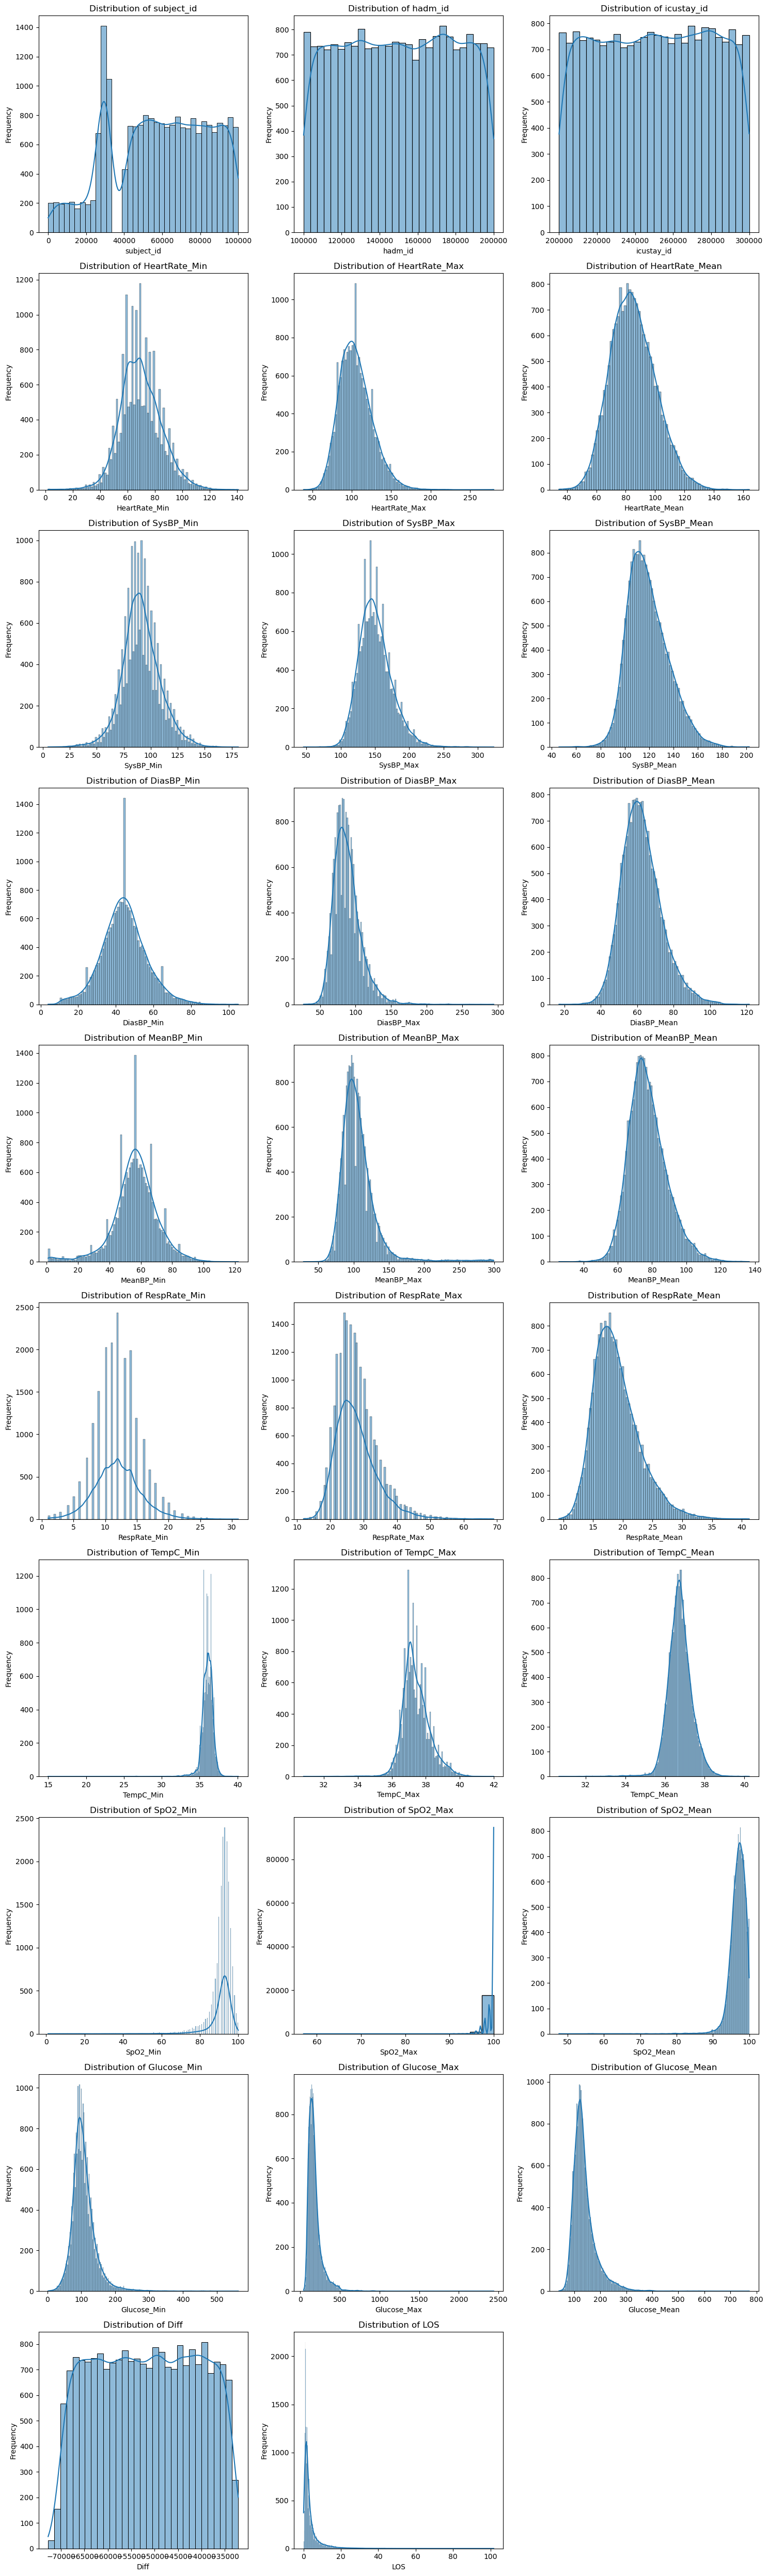

In [8]:
# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Assuming train_data is your DataFrame containing numerical columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
num_cols = len(numerical_cols)
num_plots_per_row = 3
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_cols):
    row = i // num_plots_per_row
    col_idx = i % num_plots_per_row
    ax = axes[row, col_idx]
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % num_plots_per_row != 0:
    for ax in axes.flatten()[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()


### 3. HANDLE MISSING VALUES

In [9]:
# Identify categorical columns
categorical_cols_train = train_data.select_dtypes(include=['object']).columns

Nulls = train_data[categorical_cols_train].isnull().sum()

missing_data_cols = Nulls[Nulls > 0].index

print(missing_data_cols)

Index(['MARITAL_STATUS'], dtype='object')


Just the category marital status has missing values, i impute as part of the unkown class. 

In [10]:

train_data.loc[train_data['MARITAL_STATUS'].isna(), 'MARITAL_STATUS'] = 'UNKNOWN'
train_data.loc[train_data['MARITAL_STATUS'] == 'UNKNOWN (DEFAULT)', 'MARITAL_STATUS'] = 'UNKNOWN'

print(train_data[categorical_cols_train].isnull().sum().sum())

0


I repeat the same procedure for the test in the marital status variable

In [11]:
# Identify categorical columns
categorical_cols_train = test_data.select_dtypes(include=['object']).columns

Nulls = test_data[categorical_cols_train].isnull().sum()

missing_data_cols = Nulls[Nulls > 0].index
print(missing_data_cols)

Index(['MARITAL_STATUS'], dtype='object')


In [12]:

test_data.loc[test_data['MARITAL_STATUS'].isna(), 'MARITAL_STATUS'] = 'UNKNOWN'
test_data.loc[test_data['MARITAL_STATUS'] == 'UNKNOWN (DEFAULT)', 'MARITAL_STATUS'] = 'UNKNOWN'

# Check missing data
print(test_data[categorical_cols_train].isnull().sum().sum())


0


In [13]:
train_data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'HeartRate_Min', 'HeartRate_Max',
       'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min',
       'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
       'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean',
       'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'GENDER', 'DOB',
       'ADMITTIME', 'Diff', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'ICD9_diagnosis',
       'FIRST_CAREUNIT', 'LOS'],
      dtype='object')

THE MISSING VALUES IMPUTE WITH KNN  FOR THE NUMERICAL COLUMNS

I impute with KNN imputer with 5 neighboors and for the weights i use distance


In [14]:
# Identify numerical columns
numerical_cols_train = train_data.select_dtypes(include=['int', 'float']).columns

Nulls = train_data[numerical_cols_train].isnull().sum()
missing_data_cols = Nulls[Nulls > 0].index

print("Numerical columns with missing values:", missing_data_cols)

# Check if there are missing values in the selected numerical columns
print("Missing values in train_data:")
print(train_data[missing_data_cols].isnull().sum())

Numerical columns with missing values: Index(['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean'],
      dtype='object')
Missing values in train_data:
HeartRate_Min     2187
HeartRate_Max     2187
HeartRate_Mean    2187
SysBP_Min         2208
SysBP_Max         2208
SysBP_Mean        2208
DiasBP_Min        2209
DiasBP_Max        2209
DiasBP_Mean       2209
MeanBP_Min        2186
MeanBP_Max        2186
MeanBP_Mean       2186
RespRate_Min      2189
RespRate_Max      2189
RespRate_Mean     2189
TempC_Min         2497
TempC_Max         2497
TempC_Mean        2497
SpO2_Min          2203
SpO2_Max          2203
SpO2_Mean         2203
Glucose_Min        253
Glucose_Ma

In [15]:

'''# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[missing_data_cols])
train_data.loc[:, missing_data_cols] = scaled_data

# Scale the numerical features in the test data using the scaler fitted on the training data
scaled_data_test = scaler.transform(test_data[missing_data_cols])
test_data.loc[:, missing_data_cols] = scaled_data_test

# Impute missing values with IterativeImputer for numerical columns
imputer = IterativeImputer(max_iter=20,random_state=0)
train_data[missing_data_cols] = imputer.fit_transform(train_data[missing_data_cols])

# Impute missing values in the test data using the imputer trained on the training data
test_data[missing_data_cols] = imputer.transform(test_data[missing_data_cols])

# Reverse the scaling process
train_data.loc[:, missing_data_cols] = scaler.inverse_transform(train_data[missing_data_cols])

# Reverse the scaling process for the test data
test_data.loc[:, missing_data_cols] = scaler.inverse_transform(test_data[missing_data_cols])

# Check missing data again
print("Missing values after imputation in train_data:")
print(train_data[missing_data_cols].isnull().sum().sum())
'''

'# Scale the numerical features\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(train_data[missing_data_cols])\ntrain_data.loc[:, missing_data_cols] = scaled_data\n\n# Scale the numerical features in the test data using the scaler fitted on the training data\nscaled_data_test = scaler.transform(test_data[missing_data_cols])\ntest_data.loc[:, missing_data_cols] = scaled_data_test\n\n# Impute missing values with IterativeImputer for numerical columns\nimputer = IterativeImputer(max_iter=20,random_state=0)\ntrain_data[missing_data_cols] = imputer.fit_transform(train_data[missing_data_cols])\n\n# Impute missing values in the test data using the imputer trained on the training data\ntest_data[missing_data_cols] = imputer.transform(test_data[missing_data_cols])\n\n# Reverse the scaling process\ntrain_data.loc[:, missing_data_cols] = scaler.inverse_transform(train_data[missing_data_cols])\n\n# Reverse the scaling process for the test data\ntest_data.loc[:, missing_data_cols] = 

In [16]:

# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[missing_data_cols])
train_data.loc[:, missing_data_cols] = scaled_data

# Scale the numerical features in the test data using the scaler fitted on the training data
scaled_data_test = scaler.transform(test_data[missing_data_cols])
test_data.loc[:, missing_data_cols] = scaled_data_test

# Impute missing values with KNNImputer for numerical columns
imputer = KNNImputer(n_neighbors=5, weights='distance') 
train_data[missing_data_cols] = imputer.fit_transform(train_data[missing_data_cols])

# Impute missing values in the test data using the imputer trained on the training data
test_data[missing_data_cols] = imputer.transform(test_data[missing_data_cols])

# Reverse the scaling process
train_data.loc[:, missing_data_cols] = scaler.inverse_transform(train_data[missing_data_cols])

# Reverse the scaling process for the test data
test_data.loc[:, missing_data_cols] = scaler.inverse_transform(test_data[missing_data_cols])

# Check missing data again
print("Missing values after imputation in train_data:")
print(train_data[missing_data_cols].isnull().sum().sum())


Missing values after imputation in train_data:
0


### 4. HANDLING OUTLIERS

First of all i check the numerical columns excluding the target variable that has outliers, i choose IQR method because it is robust to extreme values.

In [17]:
def detect_outliers_iqr(data, column_name, threshold=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    return outliers

numerical_columns = train_data.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns[numerical_columns != 'LOS']
outlier_columns = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(train_data, column)
    if not outliers.empty:
        outlier_columns[column] = outliers.shape[0]  # Number of outliers
        print(f"Column '{column}' has {outliers.shape[0]} outliers.")

print("Columns with outliers:", outlier_columns)

Column 'HeartRate_Min' has 395 outliers.
Column 'HeartRate_Max' has 329 outliers.
Column 'HeartRate_Mean' has 236 outliers.
Column 'SysBP_Min' has 609 outliers.
Column 'SysBP_Max' has 465 outliers.
Column 'SysBP_Mean' has 345 outliers.
Column 'DiasBP_Min' has 529 outliers.
Column 'DiasBP_Max' has 640 outliers.
Column 'DiasBP_Mean' has 462 outliers.
Column 'MeanBP_Min' has 1129 outliers.
Column 'MeanBP_Max' has 855 outliers.
Column 'MeanBP_Mean' has 485 outliers.
Column 'RespRate_Min' has 461 outliers.
Column 'RespRate_Max' has 635 outliers.
Column 'RespRate_Mean' has 525 outliers.
Column 'TempC_Min' has 607 outliers.
Column 'TempC_Max' has 737 outliers.
Column 'TempC_Mean' has 621 outliers.
Column 'SpO2_Min' has 1510 outliers.
Column 'SpO2_Max' has 2332 outliers.
Column 'SpO2_Mean' has 479 outliers.
Column 'Glucose_Min' has 955 outliers.
Column 'Glucose_Max' has 1351 outliers.
Column 'Glucose_Mean' has 1174 outliers.
Columns with outliers: {'HeartRate_Min': 395, 'HeartRate_Max': 329, '

### PLOT FOR OUTLIERS

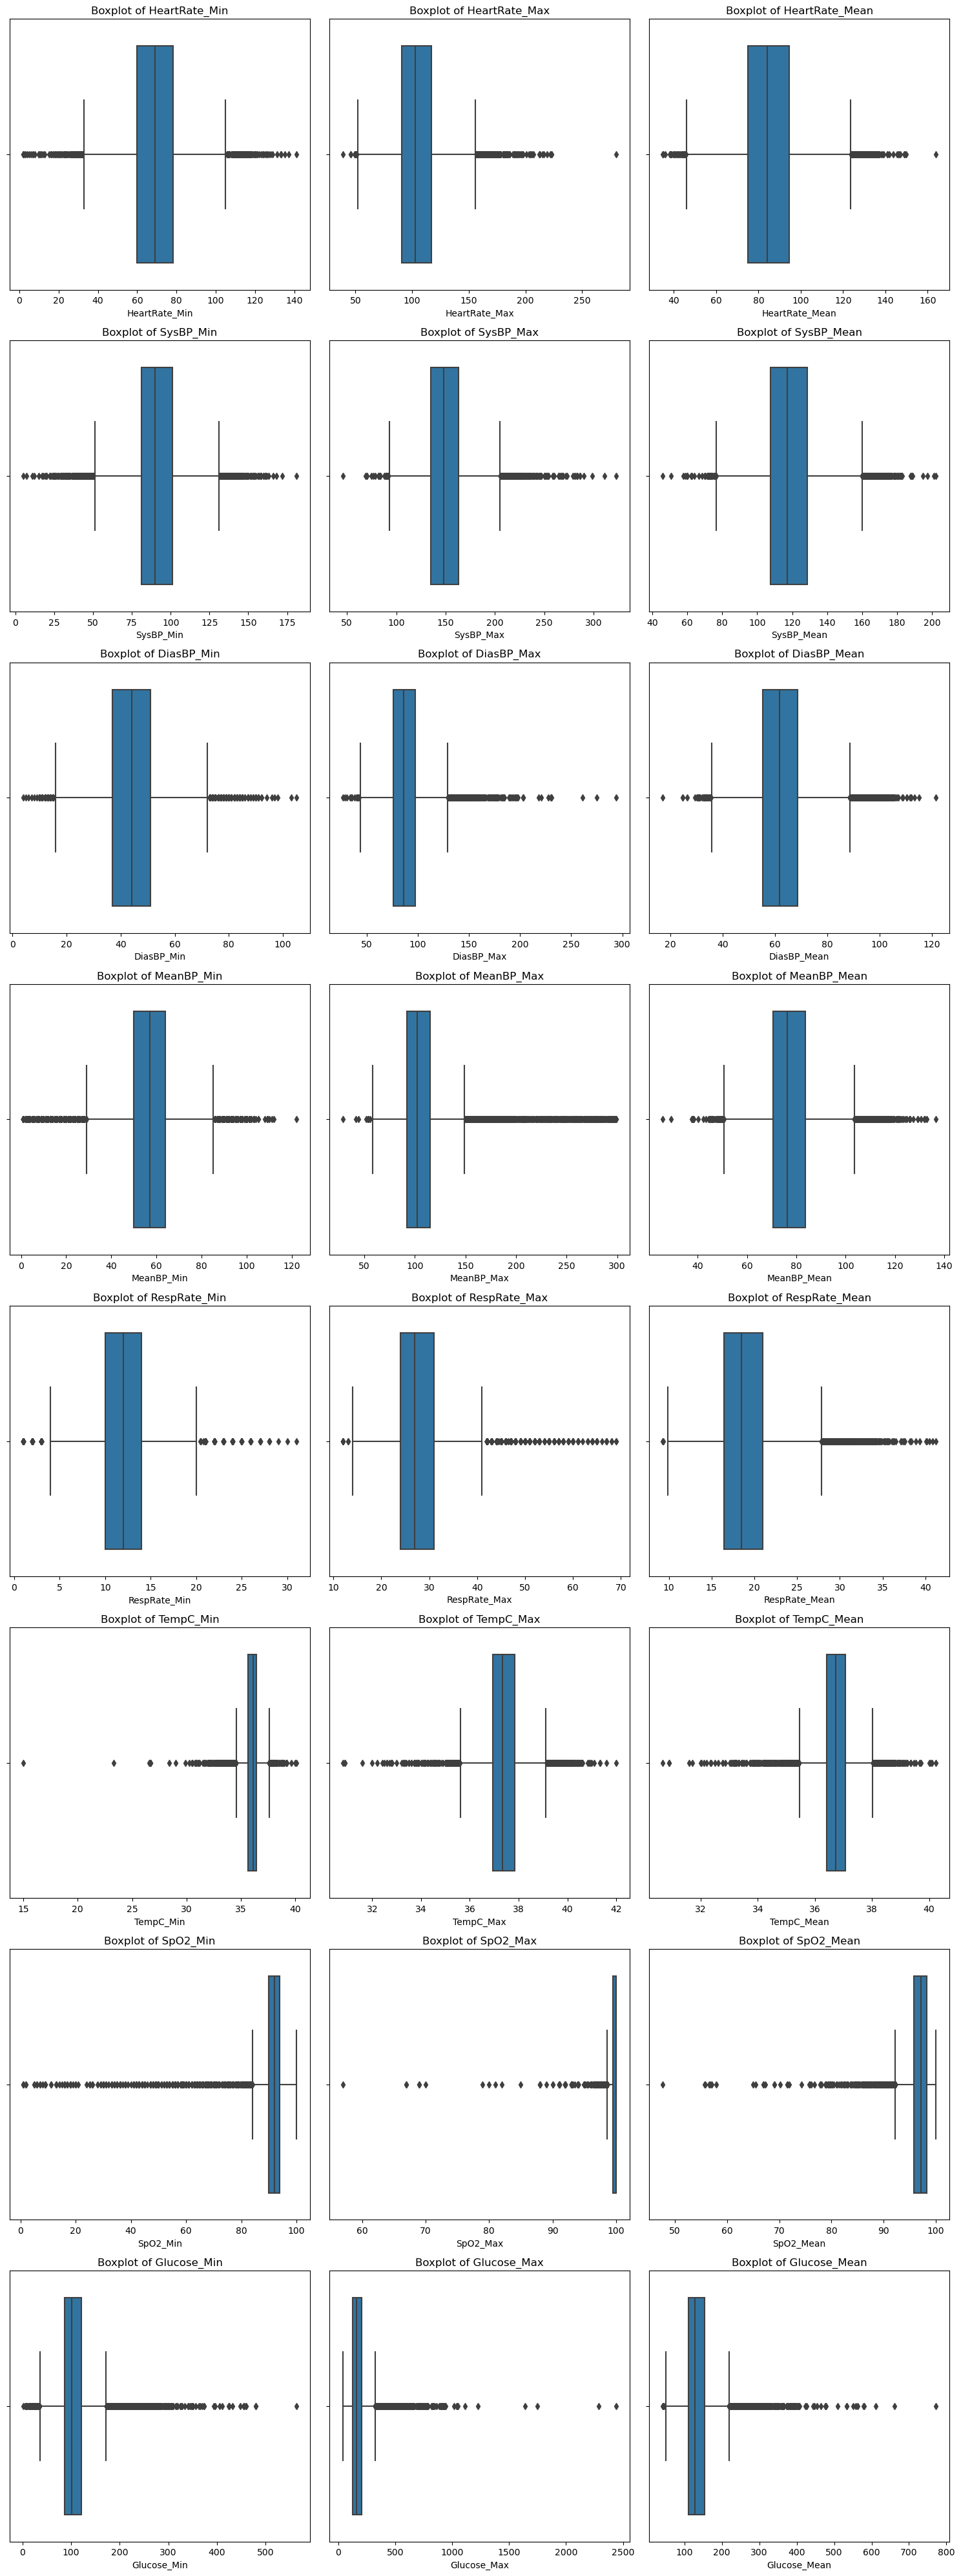

In [18]:

num_columns = len(outlier_columns)
num_rows = (num_columns + 2) // 3  # Ceiling division to ensure we have enough rows
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(outlier_columns):
    row_index = i // 3
    col_index = i % 3
    sns.boxplot(x=train_data[column], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {column}')

for i in range(num_columns, num_rows * 3):
    row_index = i // 3
    col_index = i % 3
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


I decide to impute with the mean for the outliers.

In [19]:
'''def impute_outliers_with_mean(data, columns, outliers):
    for column_name in columns:
        # Calculate the mean excluding outliers
        filtered_data = data[~data.index.isin(outliers.index)]
        mean_without_outliers = filtered_data[column_name].mean()

        # Impute the mean to the outliers
        data.loc[outliers.index, column_name] = mean_without_outliers

    return data

# Example usage:
columns_to_impute = ['HeartRate_Min','HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 
                     'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
                       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']  
# Add your list of columns here
train_data = impute_outliers_with_mean(train_data, columns_to_impute, outliers)'''

"def impute_outliers_with_mean(data, columns, outliers):\n    for column_name in columns:\n        # Calculate the mean excluding outliers\n        filtered_data = data[~data.index.isin(outliers.index)]\n        mean_without_outliers = filtered_data[column_name].mean()\n\n        # Impute the mean to the outliers\n        data.loc[outliers.index, column_name] = mean_without_outliers\n\n    return data\n\n# Example usage:\ncolumns_to_impute = ['HeartRate_Min','HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', \n                     'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',\n                       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']  \n# Add your list of columns here\ntrain_data = impute_outliers_with_mean(train_data, columns_to_impute, outliers)"

In [20]:
import pandas as pd

def impute_outliers_and_simplify(data, base_columns):
    """
    For each feature base name in base_columns, this function:
    - Calculates the mean of the _Min and _Max values.
    - Imputes outliers in the _Mean column with this mean.
    - Drops the _Min and _Max columns.
    """
    for base_col in base_columns:
        col_mean = base_col + '_Mean'
        col_min = base_col + '_Min'
        col_max = base_col + '_Max'
        
        # Calculate the mean of _Min and _Max
        mean_of_min_max = data[[col_min, col_max]].mean(axis=1)
        
    
        # Impute the _Mean outliers with the calculated mean
        mean_col_outliers = data[(data[col_mean] < data[col_min]) | (data[col_mean] > data[col_max])]
        data.loc[mean_col_outliers.index, col_mean] = mean_of_min_max.loc[mean_col_outliers.index]
        
        # Drop the _Min and _Max columns
        data.drop(columns=[col_min, col_max], inplace=True)
        
    return data


In [21]:
base_columns_to_impute = ['HeartRate', 'SysBP', 'DiasBP', 'MeanBP', 'RespRate', 'TempC', 'SpO2', 'Glucose']

# Assuming train_data is already defined 
train_data = impute_outliers_and_simplify(train_data, base_columns_to_impute)
test_data = impute_outliers_and_simplify(test_data, base_columns_to_impute)

I realized that the columns that has outliers are the ones that have min, max and mean so i decide to keep the mean column and impute the outliers with the mean of the columns min and max and then drop this to avoid collinearity. 

SEE THE DISTRIBUTION OF THE NUMERICAL VARIABLES AFTER THE TREATMENT OF THE OUTLIERS 

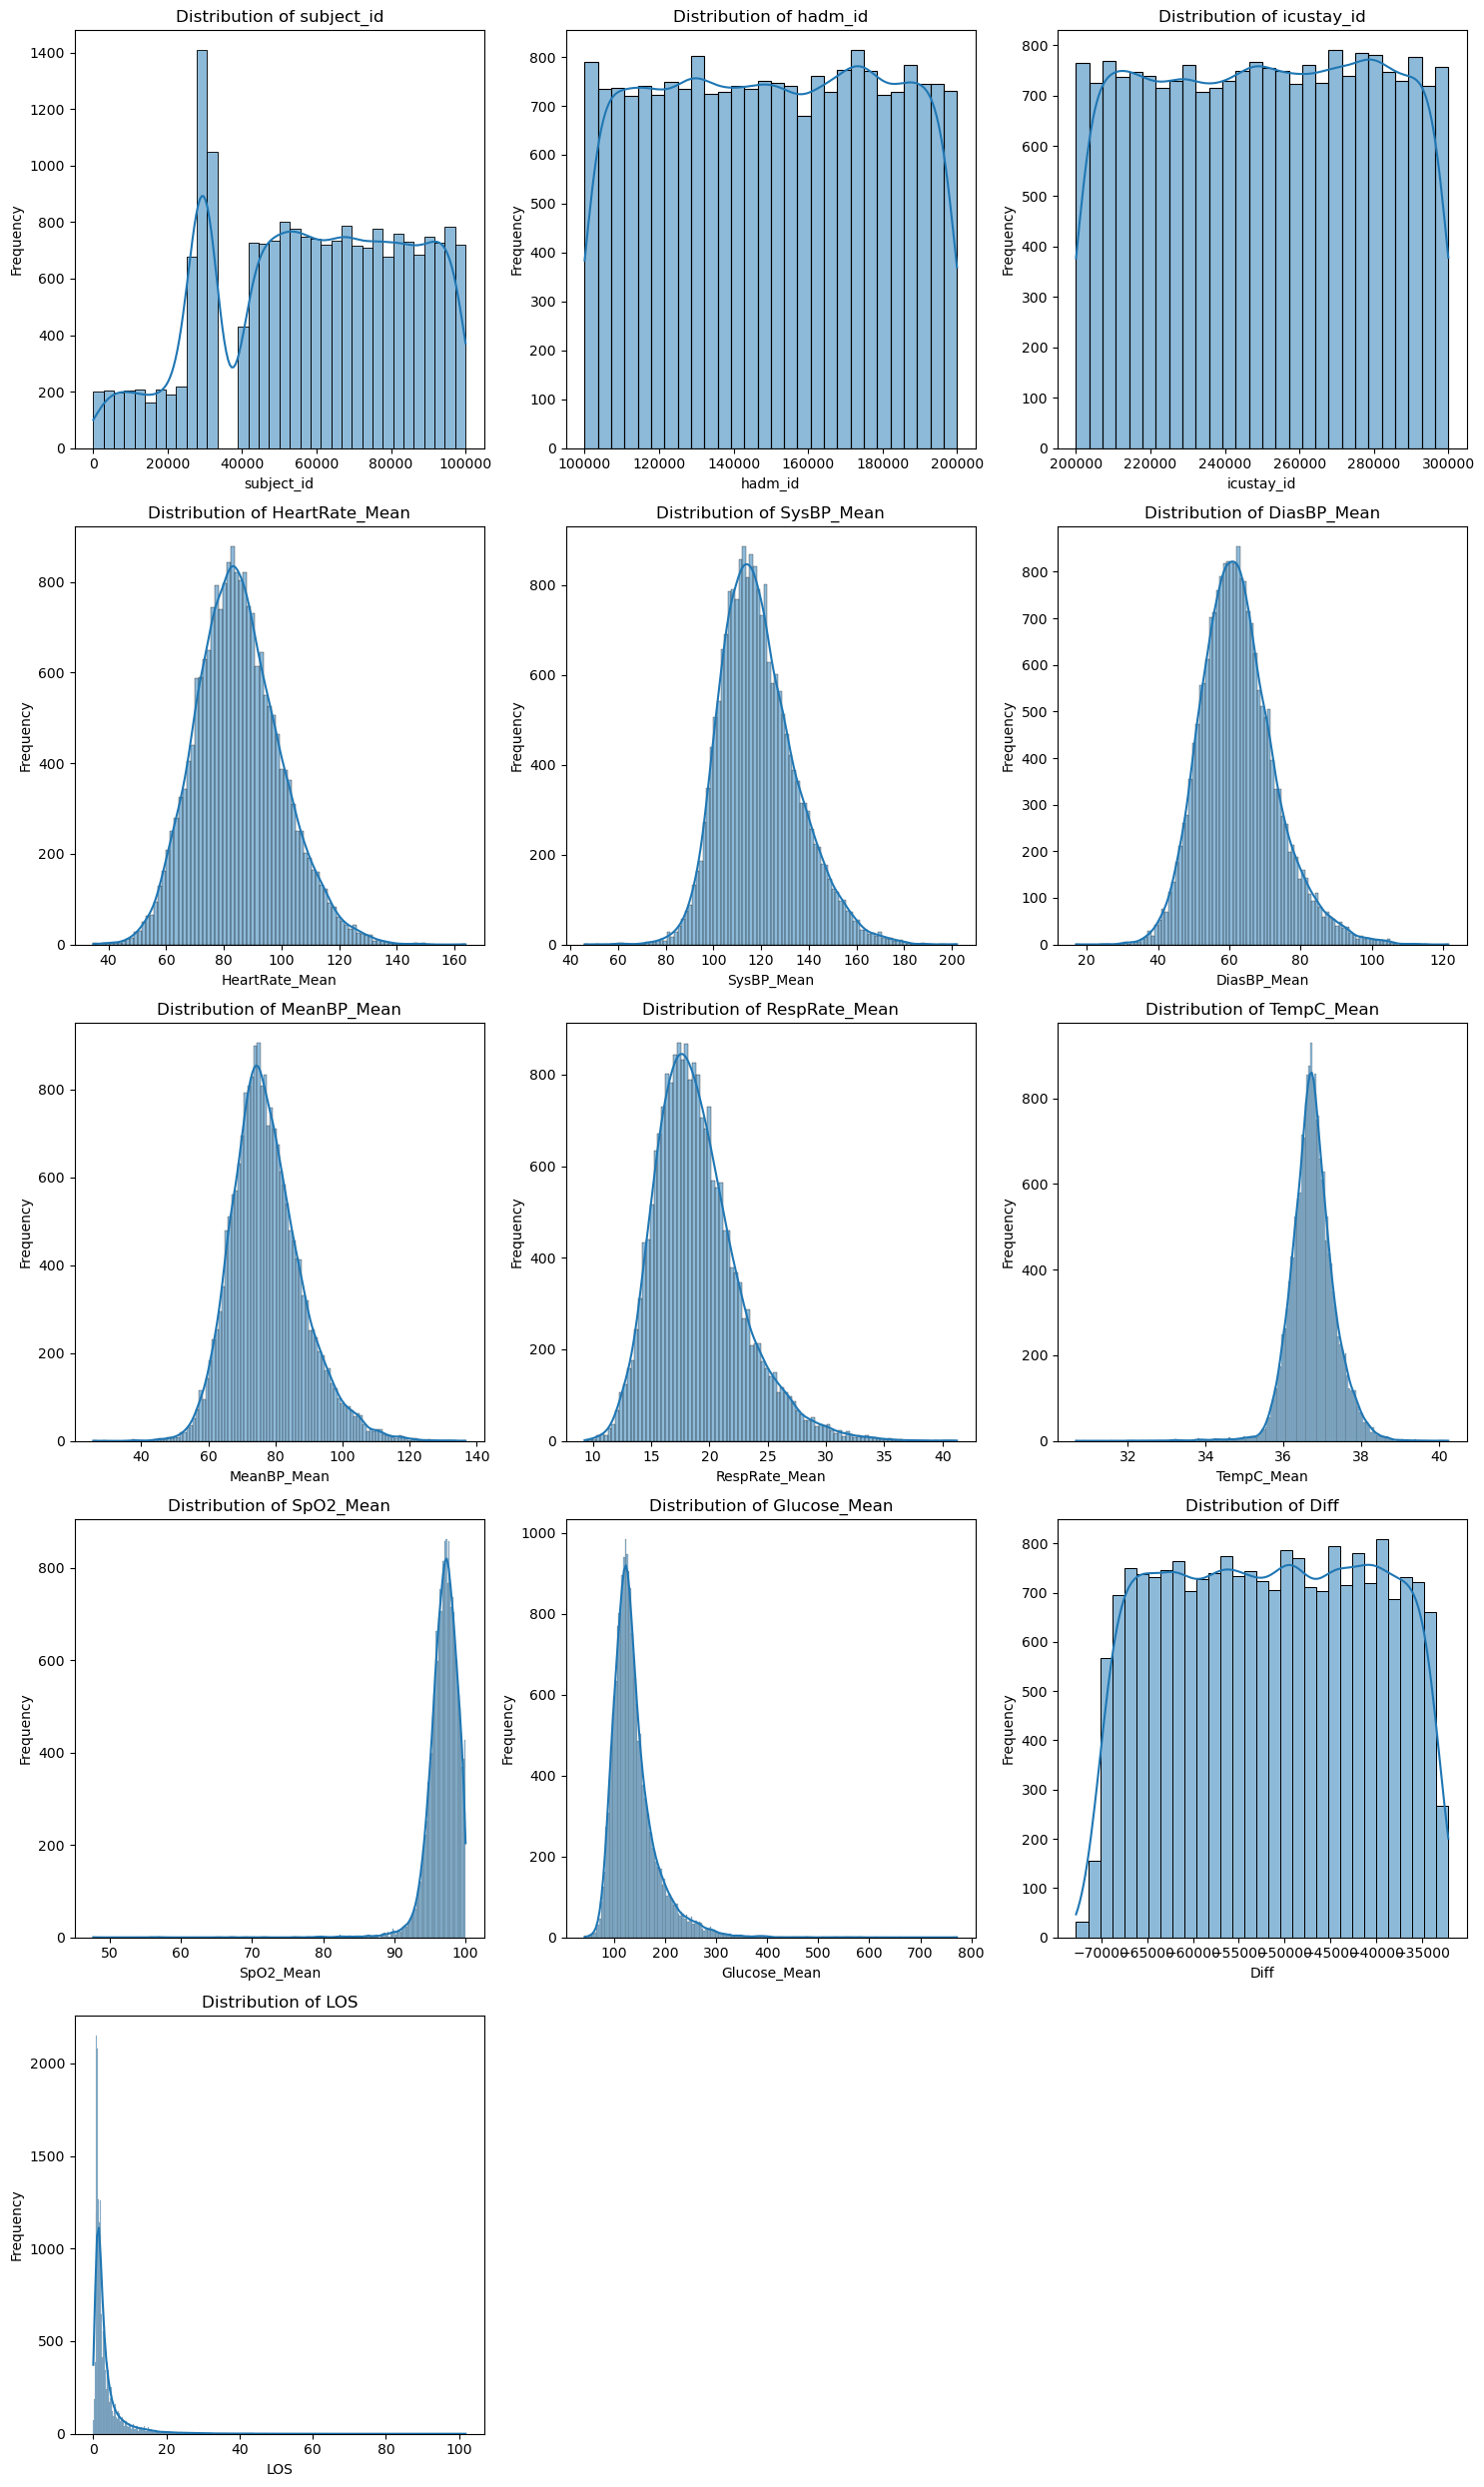

In [22]:
# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Assuming train_data is your DataFrame containing numerical columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
num_cols = len(numerical_cols)
num_plots_per_row = 3
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_cols):
    row = i // num_plots_per_row
    col_idx = i % num_plots_per_row
    ax = axes[row, col_idx]
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % num_plots_per_row != 0:
    for ax in axes.flatten()[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

### 5. ENCODE CATEGORICAL VARIABLES 

##### RELIGION

In [23]:
#Grouping unobtainale and not sepcified in other and i group hebrew in jewish religion because the test data does not have hebrew. 
train_data['RELIGION'] = train_data['RELIGION'].replace(['UNOBTAINABLE', 'NOT SPECIFIED'], 'OTHER')
train_data['RELIGION'] = train_data['RELIGION'].replace(['HEBREW'], 'JEWISH')

#Grouping unobtainale and not sepcified in other. 
test_data['RELIGION'] = test_data['RELIGION'].replace(['UNOBTAINABLE', 'NOT SPECIFIED'], 'OTHER')

#### GENDER, ADMISSION_TYPE, INSURANCE, RELIGION, MARITAL STATUS, FIRST CARE UNIT

I am going to use one hot encoder for the features that has few categories.Gender (F,M),Admission_type (Emergency, elective and urgent),Insurance(Medicare, Private, Medicaird, Self Pay and Gobernment), Religion ('PROTESTANT QUAKER', 'OTHER', 'JEWISH', 'CATHOLIC', 'BUDDHIST','EPISCOPALIAN', 'ROMANIAN EAST. ORTH', 'GREEK ORTHODOX',"JEHOVAH'S WITNESS", 'MUSLIM', 'CHRISTIAN SCIENTIST', 'HINDU','7TH DAY ADVENTIST', 'UNITARIAN-UNIVERSALIST'), Marital status ('SINGLE', 'MARRIED', 'SEPARATED', 'WIDOWED', 'DIVORCED','UNKNOWN (DEFAULT)', 'LIFE PARTNER') and First care unit ('MICU', 'SICU', 'TSICU', 'CSRU', 'CCU')

In [24]:

encoded_admission_type  = ce.OneHotEncoder(cols=['GENDER','ADMISSION_TYPE','INSURANCE','RELIGION','MARITAL_STATUS','FIRST_CAREUNIT'], return_df=True)

train_data= encoded_admission_type .fit_transform(train_data)
test_data = encoded_admission_type .fit_transform(test_data)


#### AGE (USING DOB and ADMITTIME)

In [25]:
# Convert 'DOB' column to datetime objects and add timedelta from 'Diff' to 'DOB' to get realistic datetimes
train_data['Realistic_DOB'] = pd.to_datetime(train_data['DOB']) + pd.to_timedelta(train_data['Diff'], unit='D')
train_data['Realistic_ADMITTIME'] = train_data['ADMITTIME'] = pd.to_datetime(train_data['ADMITTIME'])+ pd.to_timedelta(train_data['Diff'], unit='D')


In [26]:
# Convert 'DOB' column to datetime objects and add timedelta from 'Diff' to 'DOB' to get realistic datetimes
test_data['Realistic_DOB'] = pd.to_datetime(test_data['DOB']) + pd.to_timedelta(test_data['Diff'], unit='D')
test_data['Realistic_ADMITTIME'] = test_data['ADMITTIME'] = pd.to_datetime(test_data['ADMITTIME'])+ pd.to_timedelta(test_data['Diff'], unit='D')


In [27]:
#Get the age 
train_data['Realistic_ADMITTIME'] = pd.to_datetime(train_data['Realistic_ADMITTIME'])
train_data['Realistic_DOB'] = pd.to_datetime(train_data['Realistic_DOB'])
train_data['Age'] = (train_data['Realistic_ADMITTIME'].dt.year - train_data['Realistic_DOB'].dt.year)


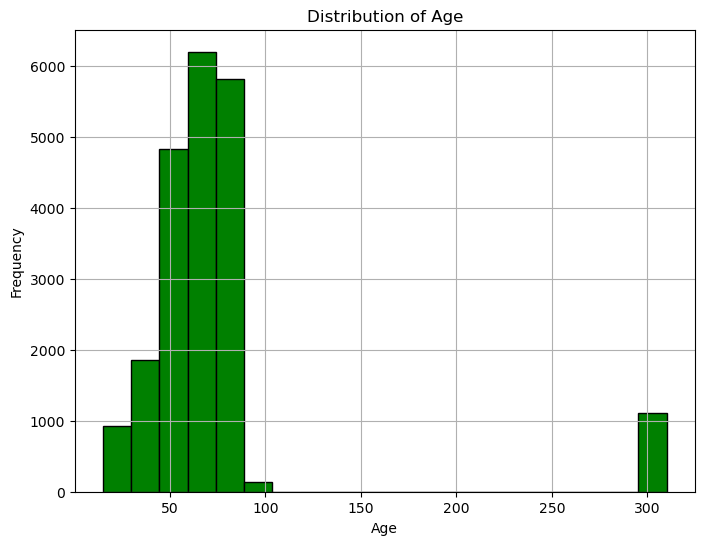

In [28]:


# Plotting the distribution of age
plt.figure(figsize=(8, 6))
plt.hist(train_data['Age'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [29]:
#Getting the mean of people that are less than 89 years and impute this mean in people over 89 

train_data.loc[train_data['Age'] > 89, 'Age'] = int(np.mean(train_data.loc[train_data['Age'] < 89, 'Age']))
train_data['Age']
#Drop 'DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' because i just want to kee the column call Age that is when the pacient enters to the hospital 
train_data.drop(['DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' ],axis=1, inplace=True)


I repeat for the test data

In [30]:
#Get the age 
test_data['Realistic_ADMITTIME'] = pd.to_datetime(test_data['Realistic_ADMITTIME'])
test_data['Realistic_DOB'] = pd.to_datetime(test_data['Realistic_DOB'])
test_data['Age'] = (test_data['Realistic_ADMITTIME'].dt.year - test_data['Realistic_DOB'].dt.year)

#Getting the mean of people that are less than 89 years and impute this mean in people over 89 

test_data.loc[test_data['Age'] > 89, 'Age'] = int(np.mean(train_data.loc[train_data['Age'] < 89, 'Age']))
test_data['Age']
#Drop 'DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' because i just want to kee the column call Age that is when the pacient enters to the hospital 
test_data.drop(['DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' ],axis=1, inplace=True)



ETHNICITY

I use binary encoder for ethnicity because this variable has high cardinality so this method reduce dimensionality.

In [31]:
ethnicity_encoder = ce.BinaryEncoder(cols=['ETHNICITY'],return_df=True)
train_data= ethnicity_encoder .fit_transform(train_data)
test_data = ethnicity_encoder .fit_transform(test_data)


ICD9_DIAGNOSIS

I add the extra data that contain the columns: SUBJECT_ID, HADM_ ID, seq_num and ICD9_code 

In [32]:
extra_data=pd.read_csv('MIMIC_diagnoses.csv')

First i pivot the dataframe to rearrange the data which i create unique combination of SUBJECT_ID and HADM_ID to form the index then the columns are formed by seq_ num and the values are filled with ICD9_code and then i merged with the original data. 

In [33]:
pivot_df = extra_data.pivot_table(index=['SUBJECT_ID', 'HADM_ID'], columns='SEQ_NUM', values='ICD9_CODE', aggfunc='first')

pivot_df.columns = [f'SEQ_NUM_{int(col)}' for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

train_data = pd.merge(train_data, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])

train_data.drop(columns=['SUBJECT_ID', 'HADM_ID'], inplace=True, errors='ignore')

test_data = pd.merge(test_data, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])

test_data.drop(columns=['SUBJECT_ID', 'HADM_ID'], inplace=True, errors='ignore')

In [34]:

# Identify the columns that start with 'SEQ_NUM'
icd9_code_columns = [col for col in train_data.columns if col.startswith('SEQ_NUM_')]

# Drop columns with more than 50% missing values
train_data = train_data.dropna(thresh=len(train_data) * 0.5, axis=1)
test_data = test_data.dropna(thresh=len(test_data) * 0.5, axis=1)

# Update icd9_code_columns after dropping columns
icd9_code_columns = [col for col in train_data.columns if col.startswith('SEQ_NUM_')]

# Initialize the target encoder
target_encoder_icd9 = ce.TargetEncoder(cols=icd9_code_columns, smoothing=0.3)

# Fit and transform the training data with the target encoder for 'SEQ_NUM' columns
train_data[icd9_code_columns] = target_encoder_icd9.fit_transform(train_data[icd9_code_columns], train_data['LOS'])

# Transform the test data with the trained encoder for 'SEQ_NUM' columns
test_data[icd9_code_columns] = target_encoder_icd9.transform(test_data[icd9_code_columns])


In other words is like a group by subject id and hadm_id and then there are 39 new columns because some patients in some hospitalization could have this number of illness, but this is not common to have this number, so for this columns i decide to drop the columns that have more than 50% of missing values, and then do target encoding because it fills the na with the mean, having just 14 columns which i am going to use to predict the models. 

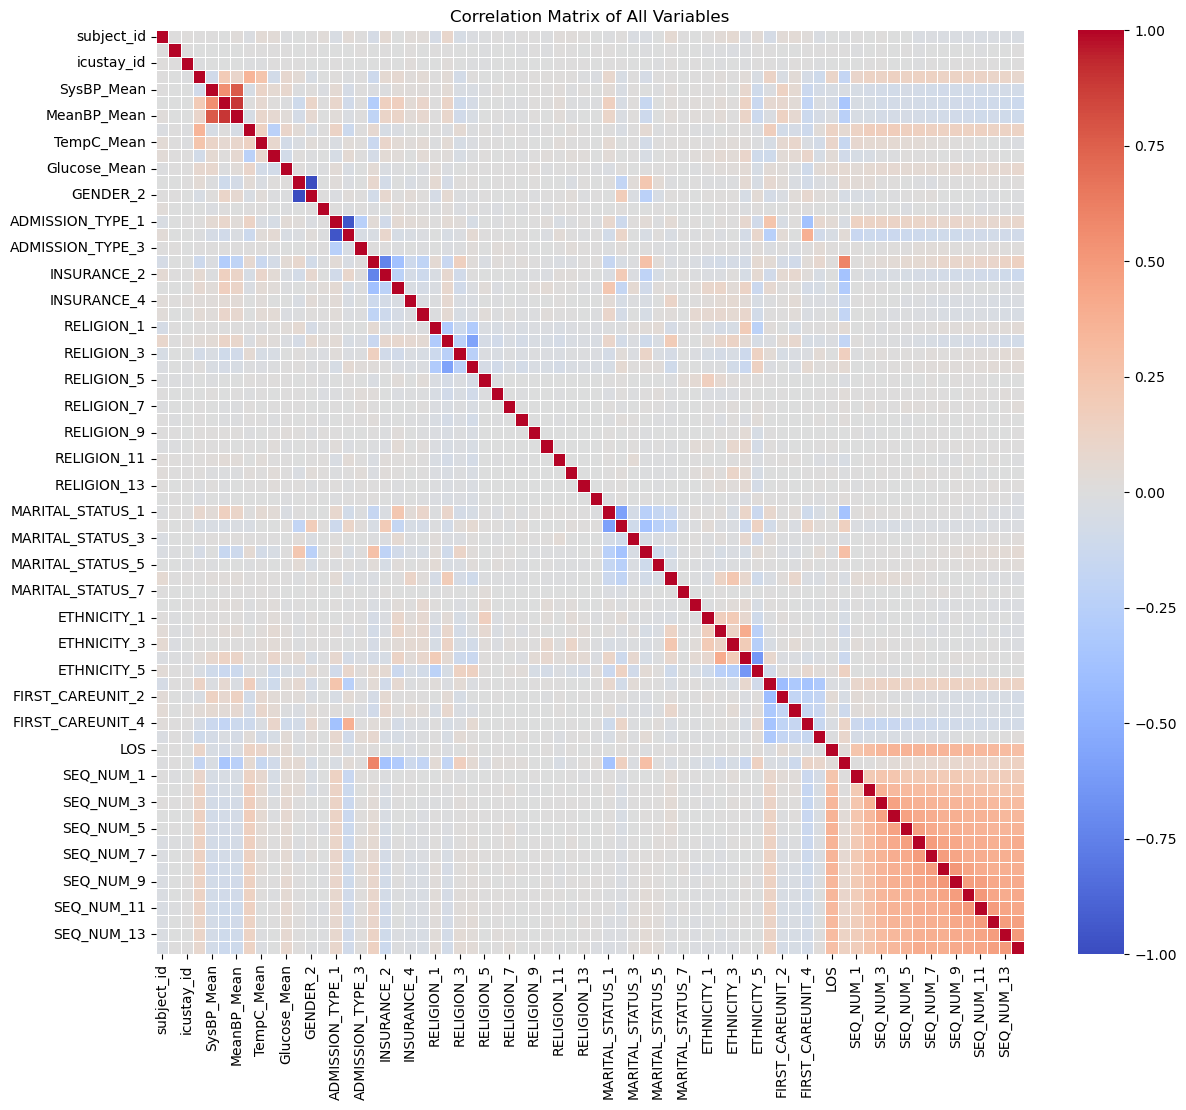

In [35]:
correlation_matrix = train_data.select_dtypes(include='number').corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of All Variables")
plt.show()  

### 6. MODELS

I use standardscaler, because with robustscaler  i got worst results. This changes significantly in my neural network.

In [36]:
# Scaling the data
scaler = preprocessing.StandardScaler()

In [37]:
#x_train are the x features for the train, x_test are the x features for the test and y_train the LOS
x_train = train_data.drop(['LOS','subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis','Diff'] ,axis=1) 
x_test=test_data.drop(['subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis','Diff'], axis=1)
y_train = train_data['LOS']

In [38]:
## Fitted to the training set
scaler.fit(x_train)

StandardScaler()

In [39]:
# Transform the x in train and test
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

## NN SKLEARN

I create a pipeline wich has selectKbest between 40 or 50 features, and i did a gridsearch of the different paramaters. The solver Adam refers to a stochastic gradient based optimizer.  In the learning rate i have constant which is literally a constant learing rate and adaptive keeps the learning rate constant to the initialize learning rate as long as the training loss keeps decreasing. This NN is overfitted because when i upload in kaggle the score increases, so i decide to work with keras wich is better in large datasets.

In [51]:
pipeline_NN = Pipeline(
    steps = [
        ("selector", SelectKBest(f_regression)),
        ("regressor", MLPRegressor(
                    solver='adam',
                    random_state=1, 
                    warm_start=True))
    ]
)

param_NN = {
    "selector__k": [50, 60],
    'regressor__activation': ['relu','logistic'],  
    'regressor__learning_rate': ['adaptive', 'constant'],  
    'regressor__hidden_layer_sizes': [(5,), (10,)], 
    'regressor__alpha': [1e-05, 1e-03], 
}


grid_NN = GridSearchCV(pipeline_NN, param_grid = param_NN, scoring = 'neg_root_mean_squared_error', cv = 2, verbose = 3,n_jobs=-1)
grid_NN.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('selector',
                                        SelectKBest(score_func=<function f_regression at 0x000002D2F57DD440>)),
                                       ('regressor',
                                        MLPRegressor(random_state=1,
                                                     warm_start=True))]),
             n_jobs=-1,
             param_grid={'regressor__activation': ['relu', 'logistic'],
                         'regressor__alpha': [1e-05, 0.001],
                         'regressor__hidden_layer_sizes': [(5,), (10,)],
                         'regressor__learning_rate': ['adaptive', 'constant'],
                         'selector__k': [50, 60]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [52]:

#save best params 
best_params = grid_NN.best_params_
# Get the best model
best_model = grid_NN.best_estimator_.named_steps["regressor"]

# Print the best parameters found
print("Best Parameters:", best_params)
print("Best score:", grid_NN.best_score_)
print('Loss:', best_model.loss_)

Best Parameters: {'regressor__activation': 'relu', 'regressor__alpha': 0.001, 'regressor__hidden_layer_sizes': (5,), 'regressor__learning_rate': 'adaptive', 'selector__k': 50}
Best score: -4.254370395439314
Loss: 8.640909407274929


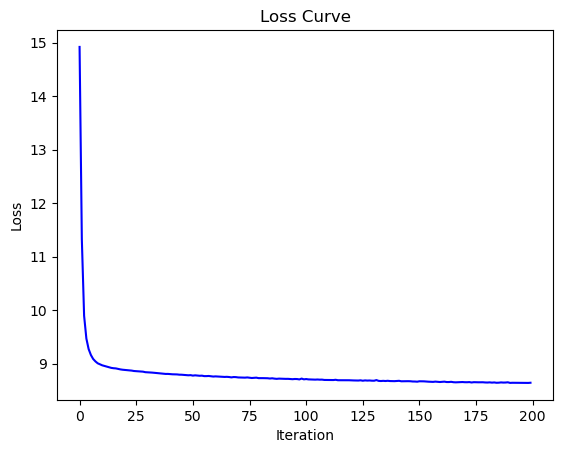

In [53]:
loss_curve = best_model.loss_curve_

plt.plot(loss_curve, color="blue")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [54]:
# Predictions on test set
y_pred_test = grid_NN.predict(X_test_scaled)

In [55]:
submission_df_MLP = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_df_MLP.to_csv('sub_neural7.csv', index=False)

## NN KERAS

My first NN has as input layer 16 neurons, then i specified the shape of the input data which this argument is only need on the first layer. I use relu for the activation function because it helps with gradient flow and then i initialize the weights of the layer with a HE normal distribution and initializes the bias terms to zero. The output layer has 1 neuron because we are analyzing a regression task. For Adam optimizer i use a learning rate of 0.001. The training process will iterate htrough the dataset 50 times. For the batch size, the model will update its weights after very 32 samples.

In [72]:
# Model architecture
Keras_MLP = Sequential([
    Dense(16,input_shape=(X_train_scaled.shape[1],),activation='relu',
           kernel_initializer=initializers.HeNormal(),bias_initializer=initializers.Zeros()),
    Dense(1,activation='relu'),
])

# Compiling the model
Keras_MLP.compile(optimizer=Adam(learning_rate=0.001), 
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'],
)

# Training the model
history = Keras_MLP.fit(
    X_train_scaled, y_train,
    epochs=50,  
    batch_size=32,
    validation_split=0.3,
   
)


Epoch 1/50
457/457 [==============================] - 3s 4ms/step - loss: 23.2764 - mean_absolute_error: 2.6424 - mean_squared_error: 23.2764 - val_loss: 19.7972 - val_mean_absolute_error: 2.4084 - val_mean_squared_error: 19.7972
Epoch 2/50
457/457 [==============================] - 2s 3ms/step - loss: 18.3538 - mean_absolute_error: 2.3606 - mean_squared_error: 18.3538 - val_loss: 19.2246 - val_mean_absolute_error: 2.3681 - val_mean_squared_error: 19.2246
Epoch 3/50
457/457 [==============================] - 1s 3ms/step - loss: 17.9088 - mean_absolute_error: 2.3098 - mean_squared_error: 17.9088 - val_loss: 19.0176 - val_mean_absolute_error: 2.3305 - val_mean_squared_error: 19.0176
Epoch 4/50
457/457 [==============================] - 1s 3ms/step - loss: 17.6544 - mean_absolute_error: 2.2817 - mean_squared_error: 17.6544 - val_loss: 18.9482 - val_mean_absolute_error: 2.3305 - val_mean_squared_error: 18.9482
Epoch 5/50
457/457 [==============================] - 1s 2ms/step - loss: 17.497

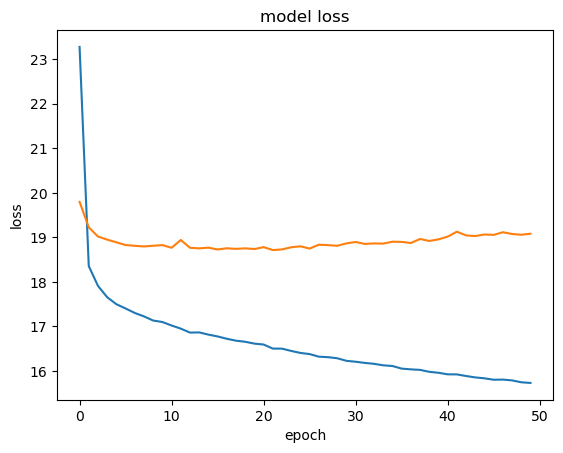

In [73]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

I add regularizers to my NN, this L1 and L2 regularization to the weights and biases of the layer to prevent overfitting by adding a penalty for larger weights to the loss function. L1 encourages sparsity by adding a penalty proportional to the absolute value of the weights and L2 discourages large weights by adding a penalty proportional to the square of the weights. Also add a dropout which randomly setting a fraction of 0.2 in this case of the input units to 0 at each update during training, forcing the network to learn redundant representations. Also add a second layer to learn a more complex network. 

In [67]:
# Updated model architecture
Keras_MLP = Sequential([
    Dense(16,activation='relu',input_shape=(X_train_scaled.shape[1],) ,
          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),
       
         kernel_initializer=initializers.HeNormal(),bias_initializer=initializers.Zeros()),
    Dropout(0.2),
    Dense(16,activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),
  
          kernel_initializer=initializers.HeNormal(),bias_initializer=initializers.Zeros()),
    Dropout(0.2),
    Dense(1,activation='relu'),
])

# Compiling the model
Keras_MLP.compile(optimizer=Adam(learning_rate=0.001), 
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'],
)

# Training the model
history = Keras_MLP.fit(
    X_train_scaled, y_train,
    epochs=50,  
    batch_size=64,
    validation_split=0.3,
   
)

Epoch 1/50
229/229 [==============================] - 2s 4ms/step - loss: 25.7306 - mean_absolute_error: 2.6815 - mean_squared_error: 25.7218 - val_loss: 20.2503 - val_mean_absolute_error: 2.2472 - val_mean_squared_error: 20.2414
Epoch 2/50
229/229 [==============================] - 1s 3ms/step - loss: 20.5086 - mean_absolute_error: 2.4515 - mean_squared_error: 20.4997 - val_loss: 19.7000 - val_mean_absolute_error: 2.1909 - val_mean_squared_error: 19.6913
Epoch 3/50
229/229 [==============================] - 1s 3ms/step - loss: 19.5134 - mean_absolute_error: 2.3660 - mean_squared_error: 19.5047 - val_loss: 19.1944 - val_mean_absolute_error: 2.2232 - val_mean_squared_error: 19.1857
Epoch 4/50
229/229 [==============================] - 1s 4ms/step - loss: 19.0094 - mean_absolute_error: 2.3479 - mean_squared_error: 19.0008 - val_loss: 19.1215 - val_mean_absolute_error: 2.2088 - val_mean_squared_error: 19.1129
Epoch 5/50
229/229 [==============================] - 1s 5ms/step - loss: 19.118

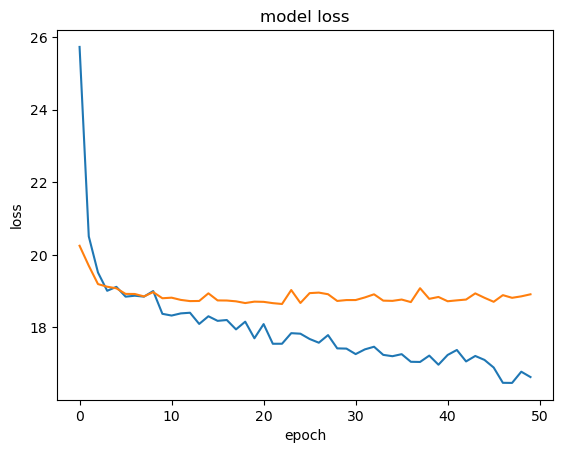

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

To improve my NN i add more number of neurons, i realized that just L2 gives me better results and also tried my last layer with a different activation function in this case softplus which is a smooth approximation to the RELU function that can output a range of positve numbers. I use early stopping when i specified that the callback should monitor the validation loss, in this case training will stop if there is no decrease in validation loss for 3 consecutive epochs.

In [79]:
# Updated model architecture
Keras_MLP = Sequential([
    Dense(64,input_shape=(X_train_scaled.shape[1],),
        kernel_regularizer=regularizers.l2( l2=0.0001),bias_regularizer=regularizers.l2(0.0001),
         kernel_initializer=initializers.HeNormal(),bias_initializer=initializers.Zeros()),
    Activation('relu'),
    Dropout(0.2),
  
    Dense(64,kernel_regularizer=regularizers.l2( l2=0.0001),bias_regularizer=regularizers.l2(0.0001),
         kernel_initializer=initializers.HeNormal(),bias_initializer=initializers.Zeros()),
   
   Activation('relu'),
   Dropout(0.2),
  
    Dense(1,activation='softplus'),
])

# Compiling the model
Keras_MLP.compile(
    optimizer=Adam(learning_rate=0.0001), 
   
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'],
)

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    verbose=-1,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=20
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Training the model
history = Keras_MLP.fit(
    X_train_scaled, y_train,
    epochs=200,  
    batch_size=256,
    validation_split=0.3,
    callbacks=[callback]
)

Epoch 1/200
58/58 [==============================] - 2s 12ms/step - loss: 33.6179 - mean_absolute_error: 2.8478 - mean_squared_error: 33.6050 - val_loss: 32.5976 - val_mean_absolute_error: 2.6342 - val_mean_squared_error: 32.5847
Epoch 2/200
58/58 [==============================] - 0s 5ms/step - loss: 30.3987 - mean_absolute_error: 2.6091 - mean_squared_error: 30.3857 - val_loss: 29.0547 - val_mean_absolute_error: 2.4223 - val_mean_squared_error: 29.0417
Epoch 3/200
58/58 [==============================] - 0s 5ms/step - loss: 26.7748 - mean_absolute_error: 2.4756 - mean_squared_error: 26.7618 - val_loss: 25.6724 - val_mean_absolute_error: 2.3319 - val_mean_squared_error: 25.6594
Epoch 4/200
58/58 [==============================] - 0s 6ms/step - loss: 23.7893 - mean_absolute_error: 2.4221 - mean_squared_error: 23.7762 - val_loss: 23.1884 - val_mean_absolute_error: 2.3284 - val_mean_squared_error: 23.1753
Epoch 5/200
58/58 [==============================] - 0s 5ms/step - loss: 21.9848 - 

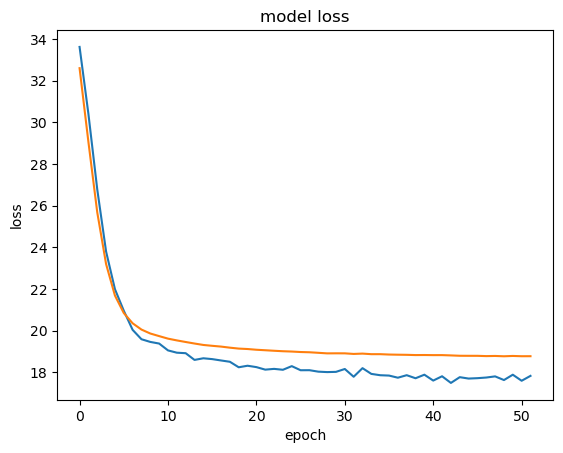

In [80]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train'], loc='upper left')
plt.show()

After a lot of trials, the highest score that i obtained with NN is the following. It has 32 neurons just keep L2 with batchnormalization before the Activation function the simplest one was the best, and in the output layer i realized that the best activation funciton was exponential and i increase a bit the learning rate for the Adam. Also i tried a lot of batch size and the final one was 64.

In [122]:
# Updated model architecture
Keras_MLP_final = Sequential([
    Dense(32,input_shape=(X_train_scaled.shape[1],),
        kernel_regularizer=regularizers.l2( l2=0.00003),bias_regularizer=regularizers.l2(0.00001),
         kernel_initializer = initializers.HeNormal(),bias_initializer=initializers.Zeros()),
   BatchNormalization(),
   Activation('relu'),
    Dropout(0.2),
   
    Dense(1,activation='exponential',kernel_initializer = initializers.HeNormal()),
])

# Compiling the model
Keras_MLP_final.compile(
    optimizer=Adam(learning_rate=0.003), 
   
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'],
)


early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
# Training the model
history = Keras_MLP_final.fit(
    X_train_scaled, y_train,
    epochs=200,  
    batch_size=64,
    validation_split=0.3,
    callbacks=[early_stopping]
)


Epoch 1/200
229/229 [==============================] - 3s 4ms/step - loss: 47.9267 - mean_absolute_error: 2.8509 - mean_squared_error: 47.9248 - val_loss: 27.6608 - val_mean_absolute_error: 2.5268 - val_mean_squared_error: 27.6589
Epoch 2/200
229/229 [==============================] - 1s 4ms/step - loss: 26.4951 - mean_absolute_error: 2.6088 - mean_squared_error: 26.4931 - val_loss: 24.3492 - val_mean_absolute_error: 2.3857 - val_mean_squared_error: 24.3472
Epoch 3/200
229/229 [==============================] - 1s 3ms/step - loss: 24.5420 - mean_absolute_error: 2.4842 - mean_squared_error: 24.5400 - val_loss: 23.7059 - val_mean_absolute_error: 2.3166 - val_mean_squared_error: 23.7039
Epoch 4/200
229/229 [==============================] - 1s 4ms/step - loss: 23.5967 - mean_absolute_error: 2.4438 - mean_squared_error: 23.5947 - val_loss: 22.9452 - val_mean_absolute_error: 2.2595 - val_mean_squared_error: 22.9431
Epoch 5/200
229/229 [==============================] - 1s 3ms/step - loss: 2

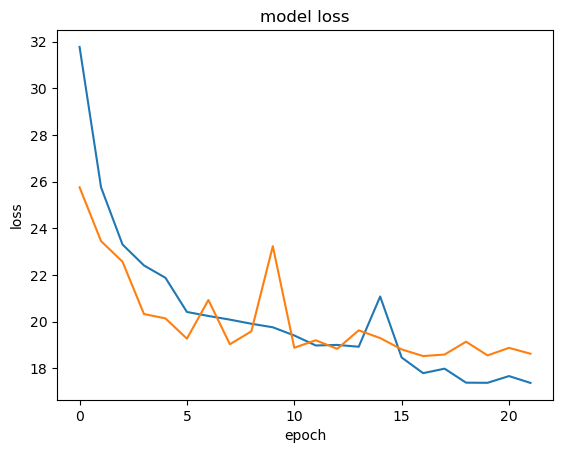

In [118]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train'], loc='upper left')
plt.show()

The loss function for the train and test data has a similar behaviour , whish is decreasing with more epochs. 

In [119]:
predictions = Keras_MLP_final.predict(X_test_scaled)

164/164 [==============================] - 0s 2ms/step


In [120]:
predictions = predictions.flatten()

In [121]:
test_predictions_submit = pd.DataFrame({"icustay_id": test_data["icustay_id"], "LOS": predictions})
test_predictions_submit.to_csv("test_RNN_1.csv", index = False)

## ENSEMBLE

In ensemble i split my data to hava a validation set to obtained the different metrics and evaluate the performance of the models.

In [40]:
from sklearn.model_selection import train_test_split
SEED=42

# Main test/train split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=SEED)


The models that i am going to use in the ensemble are SVR specifically the poly function, i do not have grid search in this particular model because it is computationally expensive. Fot KneighborsRegressor i do a grid search for the number of neighboors and the weighting functions. Random forest is also computationally expensive so i decided to grid search in maximum depth of the trees and the minimum number of samples required at a leaf node. For xgboost i optimize the learning rate, maximum depth of the trees and lambda which is the L2 regularization term. Finally, Lasso which i grid search for the alphas. The model optimizes based on the negative mean square error metric. 

In [222]:
%%time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Models
models = [
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(objective='reg:squarederror'),
    Lasso(),
]

# Model parameters for regression
svr_params = {
    'C': [2],
    'kernel': ['poly'],
    'epsilon': [0.2],
    'gamma': ['auto']
}

knn_params = {
    'n_neighbors': [30, 40],
    'weights': ['uniform', 'distance']
}


randomforest_params = {
    'n_estimators': [100],
    'max_depth': range(2,6),
    'min_samples_leaf': range(1,5),
}

xgb_params = {
    'learning_rate': [0.1, 0.5],
    'max_depth': range(3, 6),
    'lambda': [0.5,1.5],
}

lasso_params = {
    'alpha': [0.1, 1.0, 5.0]
}
params = [svr_params, knn_params, randomforest_params, xgb_params,lasso_params]
names = ['SVR', 'KNN', 'RandomForest', 'XGB','Lasso']
scores = {}


# Grid search
for i, model in enumerate(models):
    print(f"Grid-Searching for model {names[i]}...")
    best_model = GridSearchCV(
        model, params[i], n_jobs=-1, cv=5, scoring='neg_mean_squared_error', verbose=0
    )
    best_model.fit(X_train_split, y_train_split)
    print("Best model fitted")
    
    y_pred = best_model.predict(X_test_split)
    mse = mean_squared_error(y_test_split, y_pred)
    
    
    # Assign the best parameters to the models
    models[i].set_params(**best_model.best_params_)
    
    scores[names[i]] = (best_model.best_estimator_, mse)
    print(f'{names[i]} chosen hyperparameters: {best_model.best_params_}')
    print(f'{names[i]} MSE on train sample: {-best_model.best_score_}')
    print(f'{names[i]} MSE on test sample: {mse}')
    


Grid-Searching for model SVR...
Best model fitted
SVR chosen hyperparameters: {'C': 2, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'poly'}
SVR MSE on train sample: 19.947186461218966
SVR MSE on test sample: 17.51446481800726
Grid-Searching for model KNN...
Best model fitted
KNN chosen hyperparameters: {'n_neighbors': 40, 'weights': 'distance'}
KNN MSE on train sample: 21.363426239755697
KNN MSE on test sample: 17.708329795816198
Grid-Searching for model RandomForest...
Best model fitted
RandomForest chosen hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 100}
RandomForest MSE on train sample: 20.01782239051024
RandomForest MSE on test sample: 16.29854821755342
Grid-Searching for model XGB...
Best model fitted
XGB chosen hyperparameters: {'lambda': 1.5, 'learning_rate': 0.1, 'max_depth': 5}
XGB MSE on train sample: 18.158665889591102
XGB MSE on test sample: 15.64054735423729
Grid-Searching for model Lasso...
Best model fitted
Lasso chosen hyperparameters: {'alpha'

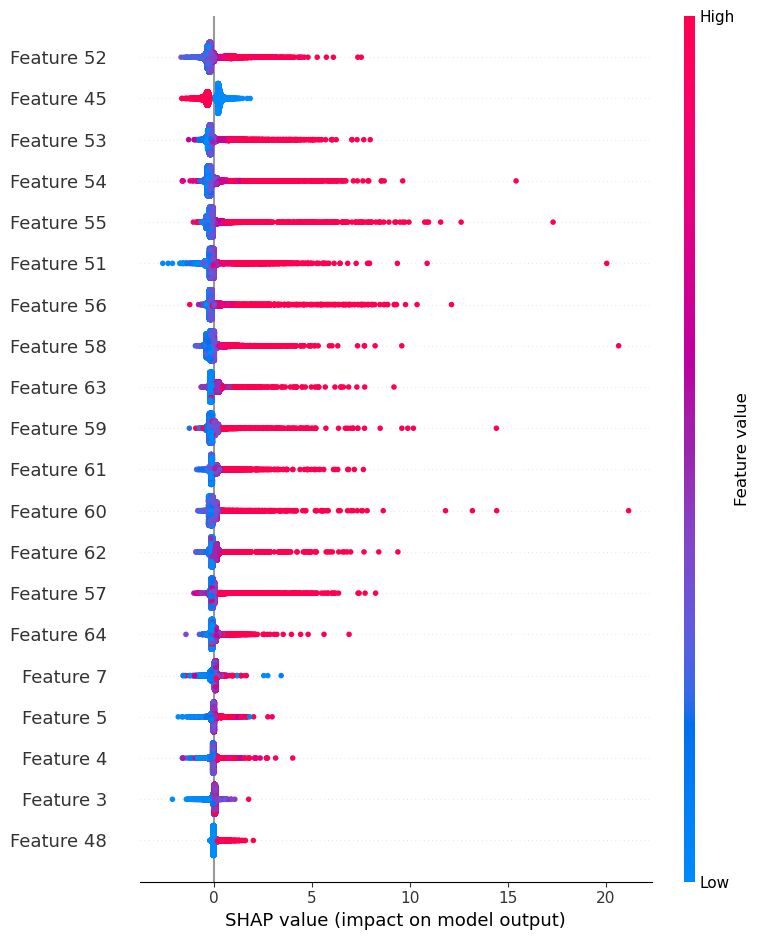

In [223]:
import shap


# Extract the XGBoost model
xgb_model = scores['XGB'][0] 

# Create the SHAP Tree Explainer using the XGBoost model
explainer = shap.Explainer(xgb_model)

# Generate SHAP values for your input features

shap_values = explainer(X_train_split)

# Summary plot
shap.summary_plot(shap_values, X_train_split)


The XGB was the best model performance, i apply the shap valu, here we could see that a vertical axis split between the variables that influence negative to the output and in the right size are the variables which influence positve to the output. The variables that have a higher impact are the ones related to the extradataset which analyzes the illness and therere other variables like age and ethnicity. 

In [234]:
x_train.columns[[51,44,52,53,54,50,55,57,62]]

Index(['SEQ_NUM_1', 'ETHNICITY_5', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4',
       'Age', 'SEQ_NUM_5', 'SEQ_NUM_7', 'SEQ_NUM_12'],
      dtype='object')

In [43]:
#np.int = np.int_
np.int = np.int64

### STACKING ENSEMBLE

Stacking technique uses 'SuperLearner' which combines the predictions of the models that we developed before SVR, KNeighborsRegressor,RandomForestRegressor,XGBRegressor and Lasso. I am going to try with 3 different meta learners. First one is ExtraTreesRegressor which is an ensemble of extremely randomized trees regressors, the second one is RandomForestRegressor is an ensemble of decision trees regressors. Finally, GradientBoostingRegressor an ensemble that builds trees one at time, the new tree helps to correct error made by previous ones. In the superlearner i use 5 fold cross validation which generates out of sample predictions form the base learners, the backend and n jobs i use to wotk with parallel computation to be faster. First chooses the models i described before and then applied the different meta learners. In my case the best metalearner is GradientBoosting with MSE: 15.599015449747855.

In [41]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

SEED = 42

# Meta learners for regression
meta_learners = [
    ExtraTreesRegressor(n_estimators=100, max_features=0.5, bootstrap=True, random_state=SEED),
    RandomForestRegressor(n_estimators=100, max_features=0.5, bootstrap=True, random_state=SEED),
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=SEED)
]

meta_learners_names = ['ExtraTrees', 'RandomForest', 'GradientBoosting']

scores = {}  # to store the MSE scores

for i, meta_learner in enumerate(meta_learners):
    # Instantiate the ensemble with 5 folds (stacking meta-learner)
    super_learner = SuperLearner(folds=5, random_state=SEED,verbose=2,backend="multiprocessing",n_jobs=-1)
    
    
    # Add the base learners and the meta learner
    super_learner.add(models)  
    super_learner.add_meta(meta_learner)

    # Train the ensemble
    super_learner.fit(X_train_split, y_train_split)
    
    # Predict the train test
    y_pred_tr = super_learner.predict(X_train_split)
    mse_tr = mean_squared_error(y_train_split, y_pred_tr)
    
    # Predict the test set (validation)
    y_pred_te = super_learner.predict(X_test_split)
    mse_te = mean_squared_error(y_test_split, y_pred_te)
    
    scores[f'Stacking_{meta_learners_names[i]}'] = (super_learner, mse_te)
    print(f'Super Learner with {meta_learners_names[i]} MSE on train sample: {mse_tr}')
    print(f'Super Learner with {meta_learners_names[i]} MSE on test sample: {mse_te}\n')



Fitting 2 layers
Processing layer-1             done | 00:03:04
Processing layer-2             done | 00:00:04
Fit complete                        | 00:03:10

Predicting 2 layers
Processing layer-1             done | 00:00:29
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:32

Predicting 2 layers
Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:13
Super Learner with ExtraTrees MSE on train sample: 9.30374282172284
Super Learner with ExtraTrees MSE on test sample: 15.639602204340294


Fitting 2 layers
Processing layer-1             done | 00:03:04
Processing layer-2             done | 00:00:11
Fit complete                        | 00:03:17

Predicting 2 layers
Processing layer-1             done | 00:00:28
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:31

Predicting 2 layers
Processing layer-1             done |

In [54]:
best_model_name = min(scores, key=lambda k: scores[k][1])
best_model = scores[best_model_name][0]
print(f"Best Model: {best_model_name} with MSE: {scores[best_model_name][1]}")


Best Model: Stacking_GradientBoosting with MSE: 15.599015449747855


In [56]:
best_model.fit(X_train_scaled, y_train)



Fitting 2 layers
Processing layer-1             done | 00:05:08
Processing layer-2             done | 00:00:06
Fit complete                        | 00:05:17


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-5', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [59]:

y_pred_test = best_model.predict(X_test_scaled)


Predicting 2 layers


Processing layer-1             done | 00:00:13
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:15


In [60]:
submission_stacking = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_stacking.to_csv('stacking1.csv', index=False)

### STACKING WITH K BEST 

Now, to improve my model i decide to use SelectKbest which is based on sklearn. This feature selection is very important because selects the features in my data that contributes most to the prediction, this helps to reduce overfitting and improve the model. The models that i am going to use in this case are SVR,knn, random forest and xgb. 

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb


# Adjusted model list to include Pipelines with SelectKBest and models
pipelines = [
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('svr', SVR())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('knn', KNeighborsRegressor())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('random_forest', RandomForestRegressor())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))]),
   
]

# Parameters also need to include the SelectKBest parameter for k
svr_params = {
    'feature_selection__k': [30, 40],  
    'svr__C': [2],
    'svr__kernel': ['poly'],
    'svr__epsilon': [0.2],
    'svr__gamma': ['auto']
}



knn_params = {
    'feature_selection__k': [25, 30],
    'knn__n_neighbors': [25, 30],
    'knn__weights': ['uniform', 'distance']
}


randomforest_params = {
    'feature_selection__k': [20, 25],
    'random_forest__n_estimators': [50],
    'random_forest__max_depth': range(4,6),
    'random_forest__min_samples_leaf': range(1,3),
}

xgb_params = {
    'feature_selection__k': [35, 40],
    'xgb__learning_rate': [0.1, 0.3],
    'xgb__max_depth': range(2, 4),
    'xgb__lambda': [3,4],
}

# Compile all parameter options into a list
params = [svr_params, knn_params, randomforest_params, xgb_params]
names = ['SVR', 'KNN', 'RandomForest', 'XGB']
scores = {}


# Rest of your code...
for i, pipeline in enumerate(pipelines):
    print(f"Grid-Searching for model {names[i]}...")
    best_model = GridSearchCV(
        pipeline, params[i], n_jobs=-1, cv=5, scoring='neg_mean_squared_error', verbose=0
    )
    best_model.fit(X_train_split, y_train_split)
    print("Best model fitted")
    
 
    
    y_pred = best_model.predict(X_test_split)
    mse = mean_squared_error(y_test_split, y_pred)
    
    
    # Assign the best parameters to the models
    pipelines[i].set_params(**best_model.best_params_)
    
    scores[names[i]] = (best_model.best_estimator_, mse)
    print(f'{names[i]} chosen hyperparameters: {best_model.best_params_}')
    print(f'{names[i]} MSE on train sample: {-best_model.best_score_}')
    print(f'{names[i]} MSE on test sample: {mse}')
    

Grid-Searching for model SVR...
Best model fitted
SVR chosen hyperparameters: {'feature_selection__k': 40, 'svr__C': 2, 'svr__epsilon': 0.2, 'svr__gamma': 'auto', 'svr__kernel': 'poly'}
SVR MSE on train sample: 20.170887619895968
SVR MSE on test sample: 17.197369137203204
Grid-Searching for model KNN...
Best model fitted
KNN chosen hyperparameters: {'feature_selection__k': 25, 'knn__n_neighbors': 30, 'knn__weights': 'uniform'}
KNN MSE on train sample: 19.778493883326384
KNN MSE on test sample: 16.592426956635688
Grid-Searching for model RandomForest...
Best model fitted
RandomForest chosen hyperparameters: {'feature_selection__k': 20, 'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 2, 'random_forest__n_estimators': 50}
RandomForest MSE on train sample: 20.14632650996981
RandomForest MSE on test sample: 16.591024420851287
Grid-Searching for model XGB...
Best model fitted
XGB chosen hyperparameters: {'feature_selection__k': 40, 'xgb__lambda': 3, 'xgb__learning_rate': 0.

In [128]:
#np.int = np.int_
np.int = np.int64

In this case i choose just the GradientBoostingRegressor because this was the bestmetalearner for the previous model. To have better performance i decided to do grid search for this meta learner in some arguments like learning rate, the number of boosting tress to be used and the maximum depth of the individual trees. 

In [162]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
SEED = 42

# Parameter grid for GradientBoostingRegressor
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    
}

# Setup GridSearchCV
gb = GradientBoostingRegressor(random_state=SEED)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_split, y_train_split)

# Use the best estimator as your meta-learner
best_gb = grid_search.best_estimator_

# Meta learners for regression with the optimized GradientBoostingRegressor
meta_learners = [best_gb]
meta_learners_names = ['Gradientboost']


scores = {}  # to store the MSE scores

for i, meta_learner in enumerate(meta_learners):
    # Instantiate the ensemble with 5 folds (stacking meta-learner)
    super_learner = SuperLearner(folds=5, random_state=SEED,verbose=2,backend="multiprocessing",n_jobs=-1)
    
    
    # Add the base learners and the meta learner
    super_learner.add(pipelines)  
    super_learner.add_meta(meta_learner)

    # Train the ensemble
    super_learner.fit(X_train_split, y_train_split)
    
    # Predict the train test
    y_pred_tr = super_learner.predict(X_train_split)
    mse_tr = mean_squared_error(y_train_split, y_pred_tr)
    
    # Predict the test set (validation)
    y_pred_te = super_learner.predict(X_test_split)
    mse_te = mean_squared_error(y_test_split, y_pred_te)
    
    scores[f'Stacking_{meta_learners_names[i]}'] = (super_learner, mse_te)
    print(f'Super Learner with {meta_learners_names[i]} MSE on train sample: {mse_tr}')
    print(f'Super Learner with {meta_learners_names[i]} MSE on test sample: {mse_te}\n')

Fitting 2 folds for each of 27 candidates, totalling 54 fits

Fitting 2 layers
Processing layer-1             done | 00:01:50
Processing layer-2             done | 00:00:07
Fit complete                        | 00:01:59

Predicting 2 layers
Processing layer-1             done | 00:00:20
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:21

Predicting 2 layers
Processing layer-1             done | 00:00:08
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:09
Super Learner with Gradientboost MSE on train sample: 14.447491211147673
Super Learner with Gradientboost MSE on test sample: 15.851229449545936



In [163]:
best_model_name = min(scores, key=lambda k: scores[k][1])
best_model = scores[best_model_name][0]
print(f"Best Model: {best_model_name} with MSE: {scores[best_model_name][1]}")

Best Model: Stacking_Gradientboost with MSE: 15.851229449545936


In [164]:
best_model.fit(X_train_scaled, y_train)


Fitting 2 layers
Processing layer-1             done | 00:02:38
Processing layer-2             done | 00:00:13
Fit complete                        | 00:02:54


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...er=None)],
   n_jobs=-1, name='group-11', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [165]:
y_pred_test = best_model.predict(X_test_scaled)


Predicting 2 layers


Processing layer-1             done | 00:00:09
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:11


In [166]:
submission_stacking_kbest = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_stacking_kbest.to_csv('stacking1_kbest.csv', index=False)

### BLENDING 

Blending is simpler than stacking because it involves a single holdout set to generate predictions for training the meta learner and coud be a risk of information leak. My stacking is still performing better than blending. 

In [68]:
from mlens.ensemble import BlendEnsemble
from sklearn.metrics import mean_squared_error



for i, meta_learner in enumerate(meta_learners):
    # Assuming 'models' is a dictionary of instantiated models and 'meta_learner' is also instantiated
    bl = BlendEnsemble(test_size=0.2, random_state=SEED, n_jobs=-1)

    # Assuming 'models.values()' is the list of your base models
    bl.add(models)  

    # Adding the meta learner
    bl.add_meta(meta_learner)

    # Training the ensemble
    bl.fit(X_train_split, y_train_split)
    # Predict the train test
    p_bl_tr = super_learner.predict(X_train_split)
    mse_tr = mean_squared_error(y_train_split, p_bl_tr)

    # Predicting with the ensemble
    p_bl = bl.predict(X_test_split)
    mse_te = mean_squared_error(y_test_split, p_bl)


    scores[f'Stacking_{meta_learners_names[i]}'] = (bl, mse_te)
    print(f'Super Learner with {meta_learners_names[i]} MSE on train sample: {mse_tr}')
    print(f'Super Learner with {meta_learners_names[i]} MSE on test sample: {mse_te}\n')


Predicting 2 layers
Processing layer-1             done | 00:00:52
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:55
Super Learner with ExtraTrees MSE on train sample: 16.703771187752544
Super Learner with ExtraTrees MSE on test sample: 16.330408126127473


Predicting 2 layers
Processing layer-1             done | 00:00:45
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:47
Super Learner with RandomForest MSE on train sample: 16.703771187752544
Super Learner with RandomForest MSE on test sample: 17.035173821422354


Predicting 2 layers
Processing layer-1             done | 00:00:46
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:48
Super Learner with GradientBoosting MSE on train sample: 16.703771187752544
Super Learner with GradientBoosting MSE on test sample: 18.177880990257993



In [69]:
best_model_name = min(scores, key=lambda k: scores[k][1])
best_model = scores[best_model_name][0]
print(f"Best Model: {best_model_name} with MSE: {scores[best_model_name][1]}")

Best Model: Stacking_ExtraTrees with MSE: 16.330408126127473


In [70]:
best_model.fit(X_train_scaled, y_train)

BlendEnsemble(array_check=None, backend=None,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=BlendIndex(X=None, raise_on_exception=...er=None)],
   n_jobs=-1, name='group-11', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       test_size=0.2, verbose=False)

In [71]:
y_pred_test = best_model.predict(X_test_scaled)

In [72]:
submission_blending = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_blending.to_csv('blending1.csv', index=False)

### FEATURE PROPAGATION WITH SELECTKBEST

I create a feature propagation using selectkbest and put the best parameters for each model that i obtained before. 

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb


# Adjusted model list to include Pipelines with SelectKBest and models
pipelines = [
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('svr', SVR())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('knn', KNeighborsRegressor())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('random_forest', RandomForestRegressor())]),
    Pipeline([('feature_selection', SelectKBest(score_func=f_regression)),
              ('xgb', xgb.XGBRegressor(objective='reg:squarederror'))]),
   
]

# Parameters also need to include the SelectKBest parameter for k
svr_params = {
    'feature_selection__k': [40],  
    'svr__C': [2],
    'svr__kernel': ['poly'],
    'svr__epsilon': [0.2],
    'svr__gamma': ['auto']
}



knn_params = {
    'feature_selection__k': [25],
    'knn__n_neighbors': [ 30],
    'knn__weights': ['uniform']
}


randomforest_params = {
    'feature_selection__k': [20],
    'random_forest__n_estimators': [100],
    'random_forest__max_depth': [5],
    'random_forest__min_samples_leaf': [2],
}

xgb_params = {
    'feature_selection__k': [40],
    'xgb__learning_rate': [0.1],
    'xgb__max_depth': [3],
    'xgb__lambda': [3],
}

# Compile all parameter options into a list
params = [svr_params, knn_params, randomforest_params, xgb_params]
names = ['SVR', 'KNN', 'RandomForest', 'XGB']
scores = {}


# Rest of your code...
for i, pipeline in enumerate(pipelines):
    print(f"Grid-Searching for model {names[i]}...")
    best_model = GridSearchCV(
        pipeline, params[i], n_jobs=-1, cv=5, scoring='neg_mean_squared_error', verbose=0
    )
    best_model.fit(X_train_split, y_train_split)
    print("Best model fitted")
    
 
    
    y_pred = best_model.predict(X_test_split)
    mse = mean_squared_error(y_test_split, y_pred)
    
    
    # Assign the best parameters to the models
    pipelines[i].set_params(**best_model.best_params_)
    
    scores[names[i]] = (best_model.best_estimator_, mse)
    print(f'{names[i]} chosen hyperparameters: {best_model.best_params_}')
    print(f'{names[i]} MSE on train sample: {-best_model.best_score_}')
    print(f'{names[i]} MSE on test sample: {mse}')
    

Grid-Searching for model SVR...
Best model fitted
SVR chosen hyperparameters: {'feature_selection__k': 40, 'svr__C': 2, 'svr__epsilon': 0.2, 'svr__gamma': 'auto', 'svr__kernel': 'poly'}
SVR MSE on train sample: 20.170887619895968
SVR MSE on test sample: 17.197369137203204
Grid-Searching for model KNN...
Best model fitted
KNN chosen hyperparameters: {'feature_selection__k': 25, 'knn__n_neighbors': 30, 'knn__weights': 'uniform'}
KNN MSE on train sample: 19.778493883326384
KNN MSE on test sample: 16.592426956635688
Grid-Searching for model RandomForest...
Best model fitted
RandomForest chosen hyperparameters: {'feature_selection__k': 20, 'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 2, 'random_forest__n_estimators': 100}
RandomForest MSE on train sample: 20.134539657643895
RandomForest MSE on test sample: 16.580672814553875
Grid-Searching for model XGB...
Best model fitted
XGB chosen hyperparameters: {'feature_selection__k': 40, 'xgb__lambda': 3, 'xgb__learning_rate': 

In [197]:
def feature_imp(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-30:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes



Identifies the features in the dataset

In [198]:
features_d = x_train.columns

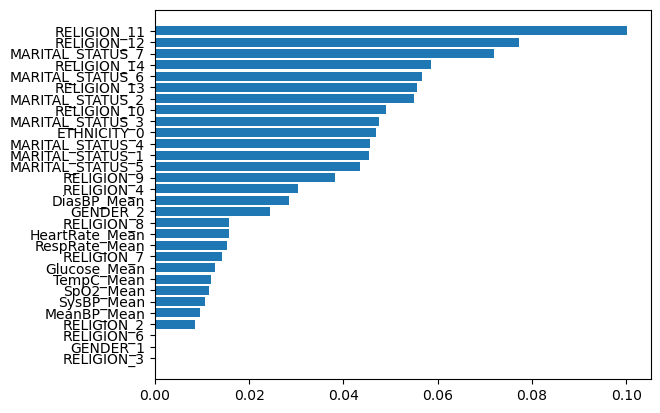

In [199]:
xgb_opt = pipelines[-1].fit(X_train_scaled, y_train)
# Access the 'xgb' step to get the feature_importances_
xgb_model = xgb_opt.named_steps['xgb']
feat_importances = abs(xgb_model.feature_importances_)
feat_indexes_xgb = feature_imp(feat_importances , features_d)

Identifies the 10 features that were likely ranked as important by an XGBoost model becuase was the one with highest performance, also finds their indices in the full feature set and creates a new dataset that includes all samples with those specific features. 

In [200]:
feat_to_prop = [features_d[i] for i in feat_indexes_xgb][-10:]
pointer = [i for i, feat in enumerate(features_d) if feat in feat_to_prop]
X_train_scaled[:, pointer]

array([[-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393],
       [-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393],
       [-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393],
       ...,
       [-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393],
       [-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393],
       [-0.05963063, -0.08896446, -0.04269431, ..., -0.20279699,
        -0.02589956, -0.05757393]])

In [201]:
    from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error

    SEED = 42

    # Meta learners for regression
    meta_learners = [
        ExtraTreesRegressor(n_estimators=100, max_features=0.5, bootstrap=True, random_state=SEED),
        RandomForestRegressor(n_estimators=100, max_features=0.5, bootstrap=True, random_state=SEED),
        GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=SEED)
    ]

    meta_learners_names = ['ExtraTrees', 'RandomForest', 'GradientBoosting']

    scores = {}  # to store the MSE scores
    for i, meta_learner in enumerate(meta_learners):
        
        super_learner = SuperLearner(folds=5, random_state=SEED,verbose=2,backend="multiprocessing",n_jobs=-1)

        super_learner.add(pipelines, propagate_features=pointer)
        super_learner.add_meta(meta_learner)
        super_learner.fit(X_train_split, y_train_split)
        
        y_pred_tr = super_learner.predict(X_train_split)
        mse_tr = mean_squared_error(y_train_split, y_pred_tr)
    
        y_pred = super_learner.predict(X_test_split)
        mse_te = mean_squared_error(y_test_split, y_pred)
        scores[f'StackingPropagating{meta_learners_names[i]}'] = (super_learner, mse_te)
        
        print(f'Super Learner with {meta_learners_names[i]} MSE on train sample: {mse_tr}')
        print(f'Super Learner with {meta_learners_names[i]} MSE on test sample: {mse_te}\n')


    


Fitting 2 layers
Processing layer-1             done | 00:02:34
Processing layer-2             done | 00:00:06
Fit complete                        | 00:02:43

Predicting 2 layers
Processing layer-1             done | 00:00:37
Processing layer-2             done | 00:00:04
Predict complete                    | 00:00:44

Predicting 2 layers
Processing layer-1             done | 00:00:12
Processing layer-2             done | 00:00:03
Predict complete                    | 00:00:19
Super Learner with ExtraTrees MSE on train sample: 14.83890130638646
Super Learner with ExtraTrees MSE on test sample: 16.75562460095273


Fitting 2 layers
Processing layer-1             done | 00:02:18
Processing layer-2             done | 00:00:13
Fit complete                        | 00:02:34

Predicting 2 layers
Processing layer-1             done | 00:00:19
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:23

Predicting 2 layers
Processing layer-1             done |

The best metalearner was gradientboosting. 

In [202]:
best_model_name = min(scores, key=lambda k: scores[k][1])
best_model = scores[best_model_name][0]
print(f"Best Model: {best_model_name} with MSE: {scores[best_model_name][1]}")

Best Model: StackingPropagatingGradientBoosting with MSE: 15.947848744179517


In [203]:
best_model.fit(X_train_scaled, y_train)


Fitting 2 layers
Processing layer-1             done | 00:03:10
Processing layer-2             done | 00:00:09
Fit complete                        | 00:03:21


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1',
   propagate_features=[27, 28, 29, 30, 31, 33, 34, 37, 38, 39],
   raise_on_exception=True, random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer...er=None)],
   n_jobs=-1, name='group-19', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [204]:
y_pred_test = best_model.predict(X_test_scaled)


Predicting 2 layers


Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:13


In [205]:
submission_future_propagation = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_future_propagation.to_csv('future_propagation.csv', index=False)

## FEATURE PROPAGATION WITH ALL THE FEATURES 

Feature propagation works better with all the features that selecting the kbest as the previous model.

In [237]:
%%time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Models
models = [
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(objective='reg:squarederror'),
    
]

# Model parameters for regression
svr_params = {
    'C': [2],
    'kernel': ['poly'],
    'epsilon': [0.2],
    'gamma': ['auto']
}

knn_params = {
    'n_neighbors': [30, 40],
    'weights': ['uniform', 'distance']
}


randomforest_params = {
    'n_estimators': [100],
    'max_depth': range(2,6),
    'min_samples_leaf': range(1,5),
}

xgb_params = {
    'learning_rate': [0.1, 0.5],
    'max_depth': range(3, 6),
    'lambda': [0.5,1.5],
}



params = [svr_params, knn_params, randomforest_params, xgb_params]
names = ['SVR', 'KNN', 'RandomForest', 'XGB']
scores = {}


# Grid search
for i, model in enumerate(models):
    print(f"Grid-Searching for model {names[i]}...")
    best_model = GridSearchCV(
        model, params[i], n_jobs=-1, cv=5, scoring='neg_mean_squared_error', verbose=0
    )
    best_model.fit(X_train_split, y_train_split)
    print("Best model fitted")
    
    y_pred = best_model.predict(X_test_split)
    mse = mean_squared_error(y_test_split, y_pred)
    
    
    # Assign the best parameters to the models
    models[i].set_params(**best_model.best_params_)
    
    scores[names[i]] = (best_model.best_estimator_, mse)
    print(f'{names[i]} chosen hyperparameters: {best_model.best_params_}')
    print(f'{names[i]} MSE on train sample: {-best_model.best_score_}')
    print(f'{names[i]} MSE on test sample: {mse}')
    

Grid-Searching for model SVR...
Best model fitted
SVR chosen hyperparameters: {'C': 2, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'poly'}
SVR MSE on train sample: 19.947186461218966
SVR MSE on test sample: 17.51446481800726
Grid-Searching for model KNN...
Best model fitted
KNN chosen hyperparameters: {'n_neighbors': 40, 'weights': 'distance'}
KNN MSE on train sample: 21.363426239755697
KNN MSE on test sample: 17.708329795816198
Grid-Searching for model RandomForest...
Best model fitted
RandomForest chosen hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 100}
RandomForest MSE on train sample: 20.073465171411954
RandomForest MSE on test sample: 16.538362782828337
Grid-Searching for model XGB...
Best model fitted
XGB chosen hyperparameters: {'lambda': 1.5, 'learning_rate': 0.1, 'max_depth': 5}
XGB MSE on train sample: 18.158665889591102
XGB MSE on test sample: 15.64054735423729
CPU times: total: 1min 49s
Wall time: 13min 12s


In [238]:
def feature_imp(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-15:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes

In [239]:
features_d = x_train.columns

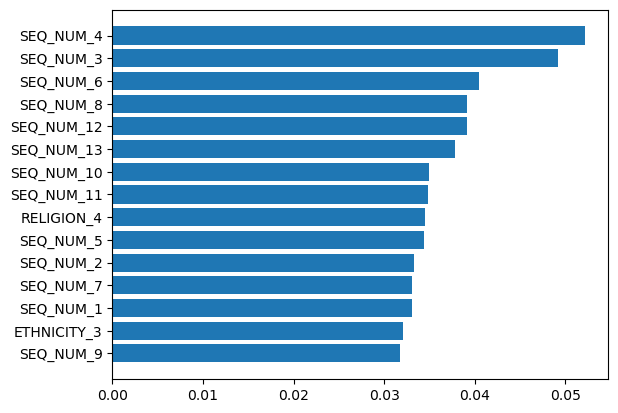

In [240]:
xgb_opt = models[-1].fit(X_train_scaled, y_train)
feat_indexes_xgb = feature_imp(abs(xgb_opt.feature_importances_), features_d)

In this graph we could see that features that have more important are the ones realted to their illness what we extracted for the extradataset.

In [241]:
feat_to_prop = [features_d[i] for i in feat_indexes_xgb][-10:]
pointer = [i for i, feat in enumerate(features_d) if feat in feat_to_prop]
X_train_scaled[:, pointer]

array([[-7.60663672e-01,  1.04793389e+00, -3.37537241e-02, ...,
         6.05818910e-01, -6.25721070e-02,  6.40733780e-01],
       [-7.60663672e-01, -9.65170265e-02, -1.34312564e+00, ...,
        -8.25820363e-01, -7.63088257e-01, -7.40008098e-01],
       [-7.60663672e-01,  2.54119551e+00, -8.32070642e-02, ...,
        -1.32473961e-01,  2.07119242e-01,  5.25663387e-01],
       ...,
       [-7.60663672e-01, -9.65170265e-02, -1.09606892e+00, ...,
        -8.25820363e-01, -7.63088257e-01, -7.40008098e-01],
       [-7.60663672e-01, -9.65161617e-02, -1.28378014e-03, ...,
         1.37123571e-01,  1.97402085e-01,  1.77466020e-01],
       [-7.60663672e-01, -7.11784322e-01, -5.30570557e-01, ...,
        -8.25820363e-01, -7.63088257e-01, -7.40008098e-01]])

I use GradientBoostingRegressor becuase this has the best performance of the model.

In [242]:
    from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error

    SEED = 42

    # Meta learners for regression
    meta_learners = [
                GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=SEED)
    ]

    meta_learners_names = ['GradientBoosting']

    scores = {}  # to store the MSE scores
    for i, meta_learner in enumerate(meta_learners):
        
        super_learner = SuperLearner(folds=5, random_state=SEED,verbose=2,backend="multiprocessing",n_jobs=-1)

        super_learner.add(pipelines, propagate_features=pointer)
        super_learner.add_meta(meta_learner)
        super_learner.fit(X_train_split, y_train_split)
        
        y_pred_tr = super_learner.predict(X_train_split)
        mse_tr = mean_squared_error(y_train_split, y_pred_tr)
    
        y_pred = super_learner.predict(X_test_split)
        mse_te = mean_squared_error(y_test_split, y_pred)
        scores[f'StackingPropagating{meta_learners_names[i]}'] = (super_learner, mse_te)
        
        print(f'Super Learner with {meta_learners_names[i]} MSE on train sample: {mse_tr}')
        print(f'Super Learner with {meta_learners_names[i]} MSE on test sample: {mse_te}\n')


Fitting 2 layers
Processing layer-1             

c:\Users\USUARIO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


done | 00:02:17
Processing layer-2             done | 00:00:14
Fit complete                        | 00:02:43

Predicting 2 layers
Processing layer-1             done | 00:00:23
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:25

Predicting 2 layers
Processing layer-1             done | 00:00:09
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:11
Super Learner with GradientBoosting MSE on train sample: 14.033099997644165
Super Learner with GradientBoosting MSE on test sample: 15.831308847065165



In [243]:
best_model_name = min(scores, key=lambda k: scores[k][1])
best_model = scores[best_model_name][0]
print(f"Best Model: {best_model_name} with MSE: {scores[best_model_name][1]}")

Best Model: StackingPropagatingGradientBoosting with MSE: 15.831308847065165


In [244]:
best_model.fit(X_train_scaled, y_train)


Fitting 2 layers
Processing layer-1             done | 00:02:41
Processing layer-2             done | 00:00:08
Fit complete                        | 00:02:53


SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1',
   propagate_features=[21, 53, 54, 55, 56, 58, 60, 61, 62, 63],
   raise_on_exception=True, random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer...er=None)],
   n_jobs=-1, name='group-21', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

Here we can notice that there is a list of the indices of features [21, 53, 54, 55, 56, 58, 60, 61, 62, 63] from the original dataset to propagate to the next layer, this will be carried forward in adittion to the predictions form the base learners. 



In [245]:
y_pred_test = best_model.predict(X_test_scaled)


Predicting 2 layers
Processing layer-1             done | 00:00:09
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:13


In [246]:
submission_future_propagation = pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_future_propagation.to_csv('future_propagation.csv', index=False)

Analyzing the test data of feature propagation

#### Plot 1

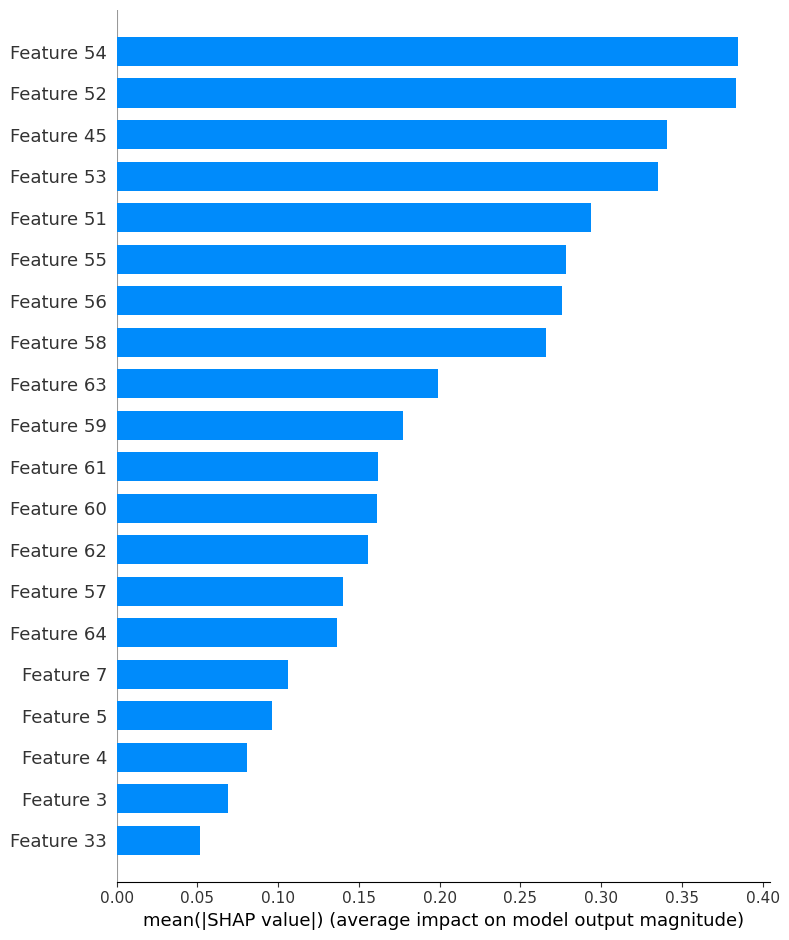

In [247]:
# Shap values for test set
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.initjs()
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

This graph shows the average effect of each feature on the magnitude of the model output, the mos important ones we could see that in the test data is seq_num which are related to their illness and also with age and ethnicity, we could see that the values are positive so these features pushes the prediction higher. 

In [253]:
x_test.columns[[53,51,44,52,50]]

Index(['SEQ_NUM_3', 'SEQ_NUM_1', 'ETHNICITY_5', 'SEQ_NUM_2', 'Age'], dtype='object')

#### Plot 2

In [251]:
# Plot the explanation of one observation
mytarget = 1  # for example, to explain the prediction of the second instance

shap.initjs()  

shap.force_plot(
    explainer.expected_value,  
    shap_values[mytarget, :],  
    X_test_scaled[mytarget, :] 
)



In this case we are going to analyze the prediction of one observation. The average prediciton of the dataset is 3.714, the actual prediction of this is 5.12 wich is higher than the base value. Each number below the plot corresponds for the features and we could see that the red ones push the prediction higher. However, the blue ones put the prediction lower. So, 5.12 is due to the combined effect of each feature's contribution.

#### Plot 3

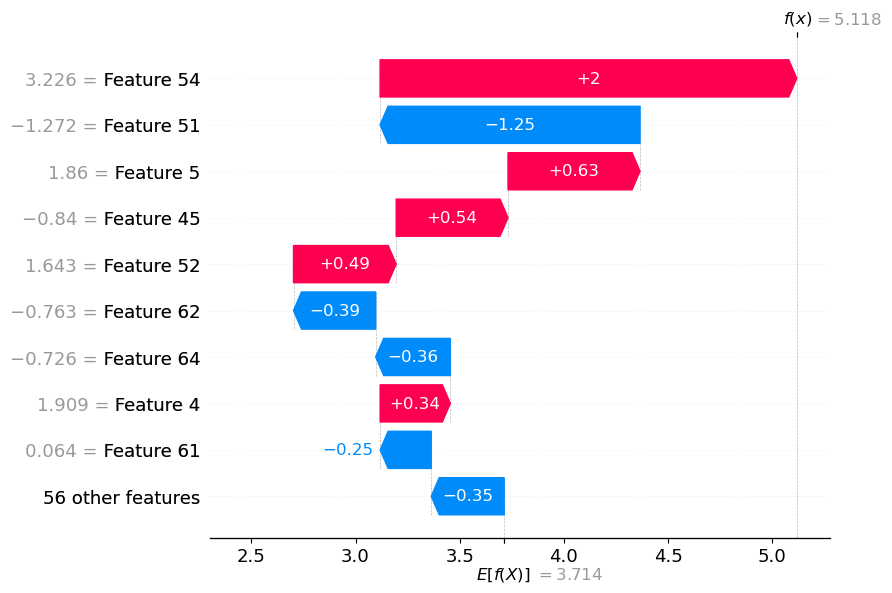

In [252]:
shap.plots.waterfall(explainer(X_test_scaled)[mytarget])

In this graph we could see that the feature 54 which is seq_num_3 (illness) has a contributtion of 3.226 which means this feature increases the model´s output significantly and the feature 51 which is age has a contribution of -1.27 decreasing the prediction. The final value of the plot which is 5.118 is the sum of the base value and all the feature contributions, this explains this indiviual prediction.  

In [256]:
x_test.columns[[53,50]]

Index(['SEQ_NUM_3', 'Age'], dtype='object')

### Bagging

I run a RandomForestRegressor and a GradientBoostingRegressor, then i compute the probabilities per model and the best model was GradientBoostingRegressor, this is my best prediction in kaggle. 

In [49]:
from sklearn.model_selection import GridSearchCV

def test_regression(xtrain, xtest, ytrain):
    # Define parameter grids for each model
    param_grids = {
       \
        "RandomForestRegressor": {
            "n_estimators": [100],
            "random_state": [42]
        },
        
        "GradientBoostingRegressor": {
            "n_estimators": [100],
            "random_state": [42]
        }
    }

    results = []

    for model_name, param_grid in param_grids.items():
        print("Computing", model_name)
        model = None

        if  model_name == "RandomForestRegressor":
            model = RandomForestRegressor()
      
        elif model_name == "GradientBoostingRegressor":
            model = GradientBoostingRegressor()

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(xtrain, ytrain)
        
        # Get best estimator from grid search
        best_estimator = grid_search.best_estimator_

        # Predict on test set
        predictions = best_estimator.predict(xtest)
        
        results.append((model_name, best_estimator.get_params(), predictions))
        
    return results

out = test_regression(X_train_split, X_test_split, y_train_split)

Computing RandomForestRegressor
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Computing GradientBoostingRegressor
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [50]:
# Compute Probabilities per model
P5 = pd.DataFrame()
for i in range(len(out)):
    this_case = out[i][2]
    this_df = pd.DataFrame(this_case, columns=[out[i][0]+str(out[i][1])])
    P5 = pd.concat([P5, this_df], axis=1)
P5

,"RandomForestRegressor{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}","GradientBoostingRegressor{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}"
0,3.193004,3.715468
1,1.531834,1.985522
2,1.899389,2.136565
3,2.141929,2.260244
4,1.737289,2.036710
...,...,...
2084,9.805109,5.311228
2085,3.316594,2.736577
2086,2.452441,2.730139
2087,1.496449,1.361108


In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the score_models function
def score_models(predictions_df, true_values):
  
    models = predictions_df.columns
    scores = {}
    for model in models:
        mse = mean_squared_error(true_values, predictions_df[model])
        scores[model] = mse
    return scores

# Apply the score_models function to your predictions and true values
my_scores = score_models(P5, y_test_split)

# Print out the MSE for each model
for model_name, mse in my_scores.items():
    print(f"{model_name}: MSE = {mse}")

# Find the model with the lowest MSE
best_model_name = min(my_scores, key=my_scores.get)
print(f"Best Model: {best_model_name} with MSE: {my_scores[best_model_name]}")



RandomForestRegressor{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}: MSE = 15.640245596430848
GradientBoostingRegressor{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}: MSE = 15.406937126799884
Best Model: GradientBoostingRegressor{'alpha': 0.9, 'ccp_alpha': 0.0,

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the best model with identified best parameters
best_model_params = {
    'alpha': 0.9,
    'ccp_alpha': 0.0,
    'criterion': 'friedman_mse',
    'init': None,
    'learning_rate': 0.1,
    'loss': 'squared_error',
    'max_depth': 3,
    'max_features': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_iter_no_change': None,
    'random_state': 42,
    'subsample': 1.0,
    'tol': 0.0001,
    'validation_fraction': 0.1,
    'verbose': 0,
    'warm_start': False
}

best_model = GradientBoostingRegressor(**best_model_params)


In [53]:
best_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [54]:

y_pred_test = best_model.predict(X_test_scaled)

In [55]:
submission_gradient= pd.DataFrame({'icustay_id': test_data['icustay_id'].values,'LOS': y_pred_test})

submission_gradient.to_csv('gradient.csv', index=False)